## Analysis on acute lower respiratory infections

Team: Runtime Terrors

Members:    
> Vinu Prasad Bhambore (vpb2)

> Srijith Srinath (ssrina2)

> Dhruman Jayesh Shah (djshah5)

##### Notebook Update 2 - 02/28/2020

Name of the dataset: PAHO Regional Mortality Dataset
    
Background: The PAHO Regional Mortality Database is an integrated database consisting of national datasets from Member States and is updated annually. The dataset includes data from 48 countries and territories.  The source of the national datasets varies by country. For some countries the national institution mandated to collect, integrate, and disseminate mortality data and information is the Ministry of Health, and for others it is the National Institute of Statistics. 

Source: WHO

File Size: 221MB

#### Importing the necessary packages

In [18]:
import pandas as pd
import numpy as np
import warnings
from collections import defaultdict
import matplotlib.pyplot as plt 
import seaborn as sns 

import ipywidgets as widgets
from ipywidgets import interact, interactive_output
from IPython.display import display, clear_output

from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, FactorRange
from bokeh.core.properties import value
from bokeh.layouts import row, column
from bokeh.plotting import figure, show
from bokeh.palettes import d3
from bokeh.models.widgets import DataTable, TableColumn
warnings.filterwarnings('ignore')

output_notebook()

Loading BokehJS ...

In [19]:
Caribbean = ["Cuba", "Puerto Rico", "St. Vincent and the Grenadines", "St. Lucia", "Jamaica", "Aruba", 
             "St. Kitts and Nevis", "Dominica", "Dominican Republic", "Barbados", "Antigua and Barbuda", 
             "Grenada", "Haiti", "Trinidad and Tobago", "Curacao", "Bahamas, The", "Virgin Islands (U.S.)", 
             "Cayman Islands", "Turks and Caicos Islands"]
CentralAmerica = ["Mexico", "Guatemala", "Panama", "Nicaragua", "El Salvador", "Costa Rica", "Belize", "Honduras"]
SouthAmerica = ["Brazil", "Colombia", "Argentina", "Peru", "Chile", "Paraguay", "Uruguay", "Venezuela, RB", 
                "Ecuador", "Suriname", "Bolivia", "Guyana"]
NorthernAmerica = ["United States", "Canada", "Bermuda"]

In [20]:
# read the dataset from local
url = 'Data/MortalityData_filtered.csv'
df = pd.read_csv(url)

In [21]:
df.head()

,CountryName,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths,Class,Zone
0,Brazil,2017,Male,21,J410,1,Bronchitis,SouthAmerica
1,Brazil,2017,Male,17,J40,1,Bronchitis,SouthAmerica
2,Brazil,2017,Male,16,J42,1,Bronchitis,SouthAmerica
3,Brazil,2017,Male,22,J418,1,Bronchitis,SouthAmerica
4,Brazil,2017,Male,20,J411,1,Bronchitis,SouthAmerica


The following are the codes that are of our interest. The 2 main lower respiratory infections that we will concentrate on are as follows -

1. Bronchitis
2. Tuberculosis

The codes for each of them are as follows -

**Bronchitis**<br>
J20  Acute bronchitis<br>
J40  Bronchitis, not specified as acute or chronic<br>
J41  Simple and mucopurulent chronic bronchitis<br>
J42  Unspecified chronic bronchitis<br>

**Tuberculosis**<br>
A15  Respiratory tuberculosis<br>
A17  Tuberculosis of nervous system<br>
A18  Tuberculosis of other organs<br>
A19  Miliary tuberculosis<br>

## Time Series Viability

For any time series we need enough data points to make a viable prediction. For this exercise we will work only with the mortality dataset in order to check whether we have enough data for each of these ICD codes seperately. In the end we will check if we need to take a look at either of the diseases as a whole without looking at the ICD codes.

Let us now take a look at the numbers for each of the zones based on individual ICDS.

#### For South America

In [5]:
df_SouthAmerica = df[df['Zone'] == "SouthAmerica"]
df_SouthAmerica.head()

,CountryName,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths,Class,Zone
0,Brazil,2017,Male,21,J410,1,Bronchitis,SouthAmerica
1,Brazil,2017,Male,17,J40,1,Bronchitis,SouthAmerica
2,Brazil,2017,Male,16,J42,1,Bronchitis,SouthAmerica
3,Brazil,2017,Male,22,J418,1,Bronchitis,SouthAmerica
4,Brazil,2017,Male,20,J411,1,Bronchitis,SouthAmerica


##### Bronchitis for South America

In [6]:
df_SouthAmerica_Bronchitis = df_SouthAmerica[df_SouthAmerica['Class']=="Bronchitis"]
df_SouthAmerica_Bronchitis.drop(['Gender', 'AgeGroupCode'], axis=1, inplace=True)
df_SouthAmerica_Bronchitis = df_SouthAmerica_Bronchitis.groupby(['CountryName', 'MortalityYear', 
                                                                 'ICD10', 'Class', 'Zone']) \
                                                                ['Deaths'].sum().reset_index()

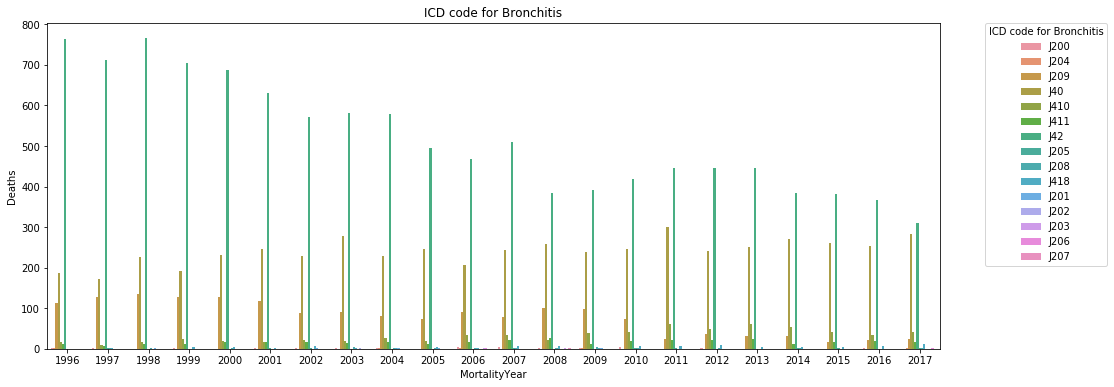

In [14]:
plt.figure(figsize=(16, 6))
temp = df_SouthAmerica_Bronchitis[df_SouthAmerica_Bronchitis['CountryName']=="Brazil"]
sns.barplot(x="MortalityYear", y="Deaths",
            hue="ICD10", 
            data=temp).set_title("ICD code for Bronchitis")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title("ICD code")

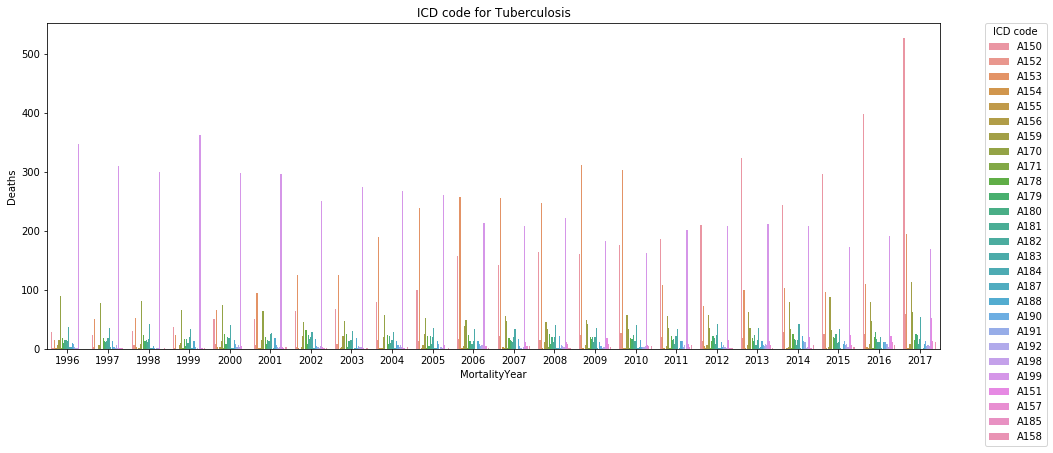

In [15]:
plt.figure(figsize=(16, 6))
temp = df_SouthAmerica_Tuberculosis[df_SouthAmerica_Tuberculosis['CountryName']=="Brazil"]
sns.barplot(x="MortalityYear", y="Deaths",
            hue="ICD10", 
            data=temp).set_title("ICD code for Tuberculosis")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title("ICD code")

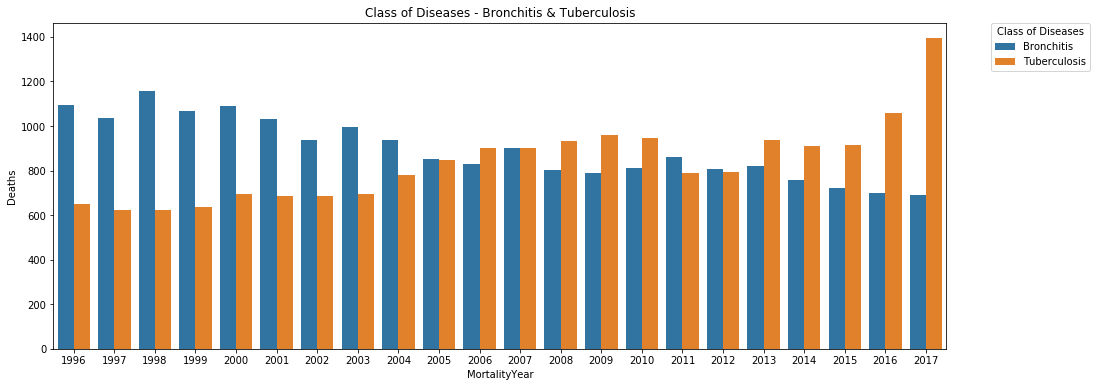

In [17]:
plt.figure(figsize=(16, 6))
temp = df_SouthAmerica_noICD[df_SouthAmerica_noICD['CountryName']=="Brazil"]
sns.barplot(x="MortalityYear", y="Deaths",
            hue="Class", 
            data=temp).set_title("Class of Diseases - Bronchitis & Tuberculosis")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title("Class of Diseases")

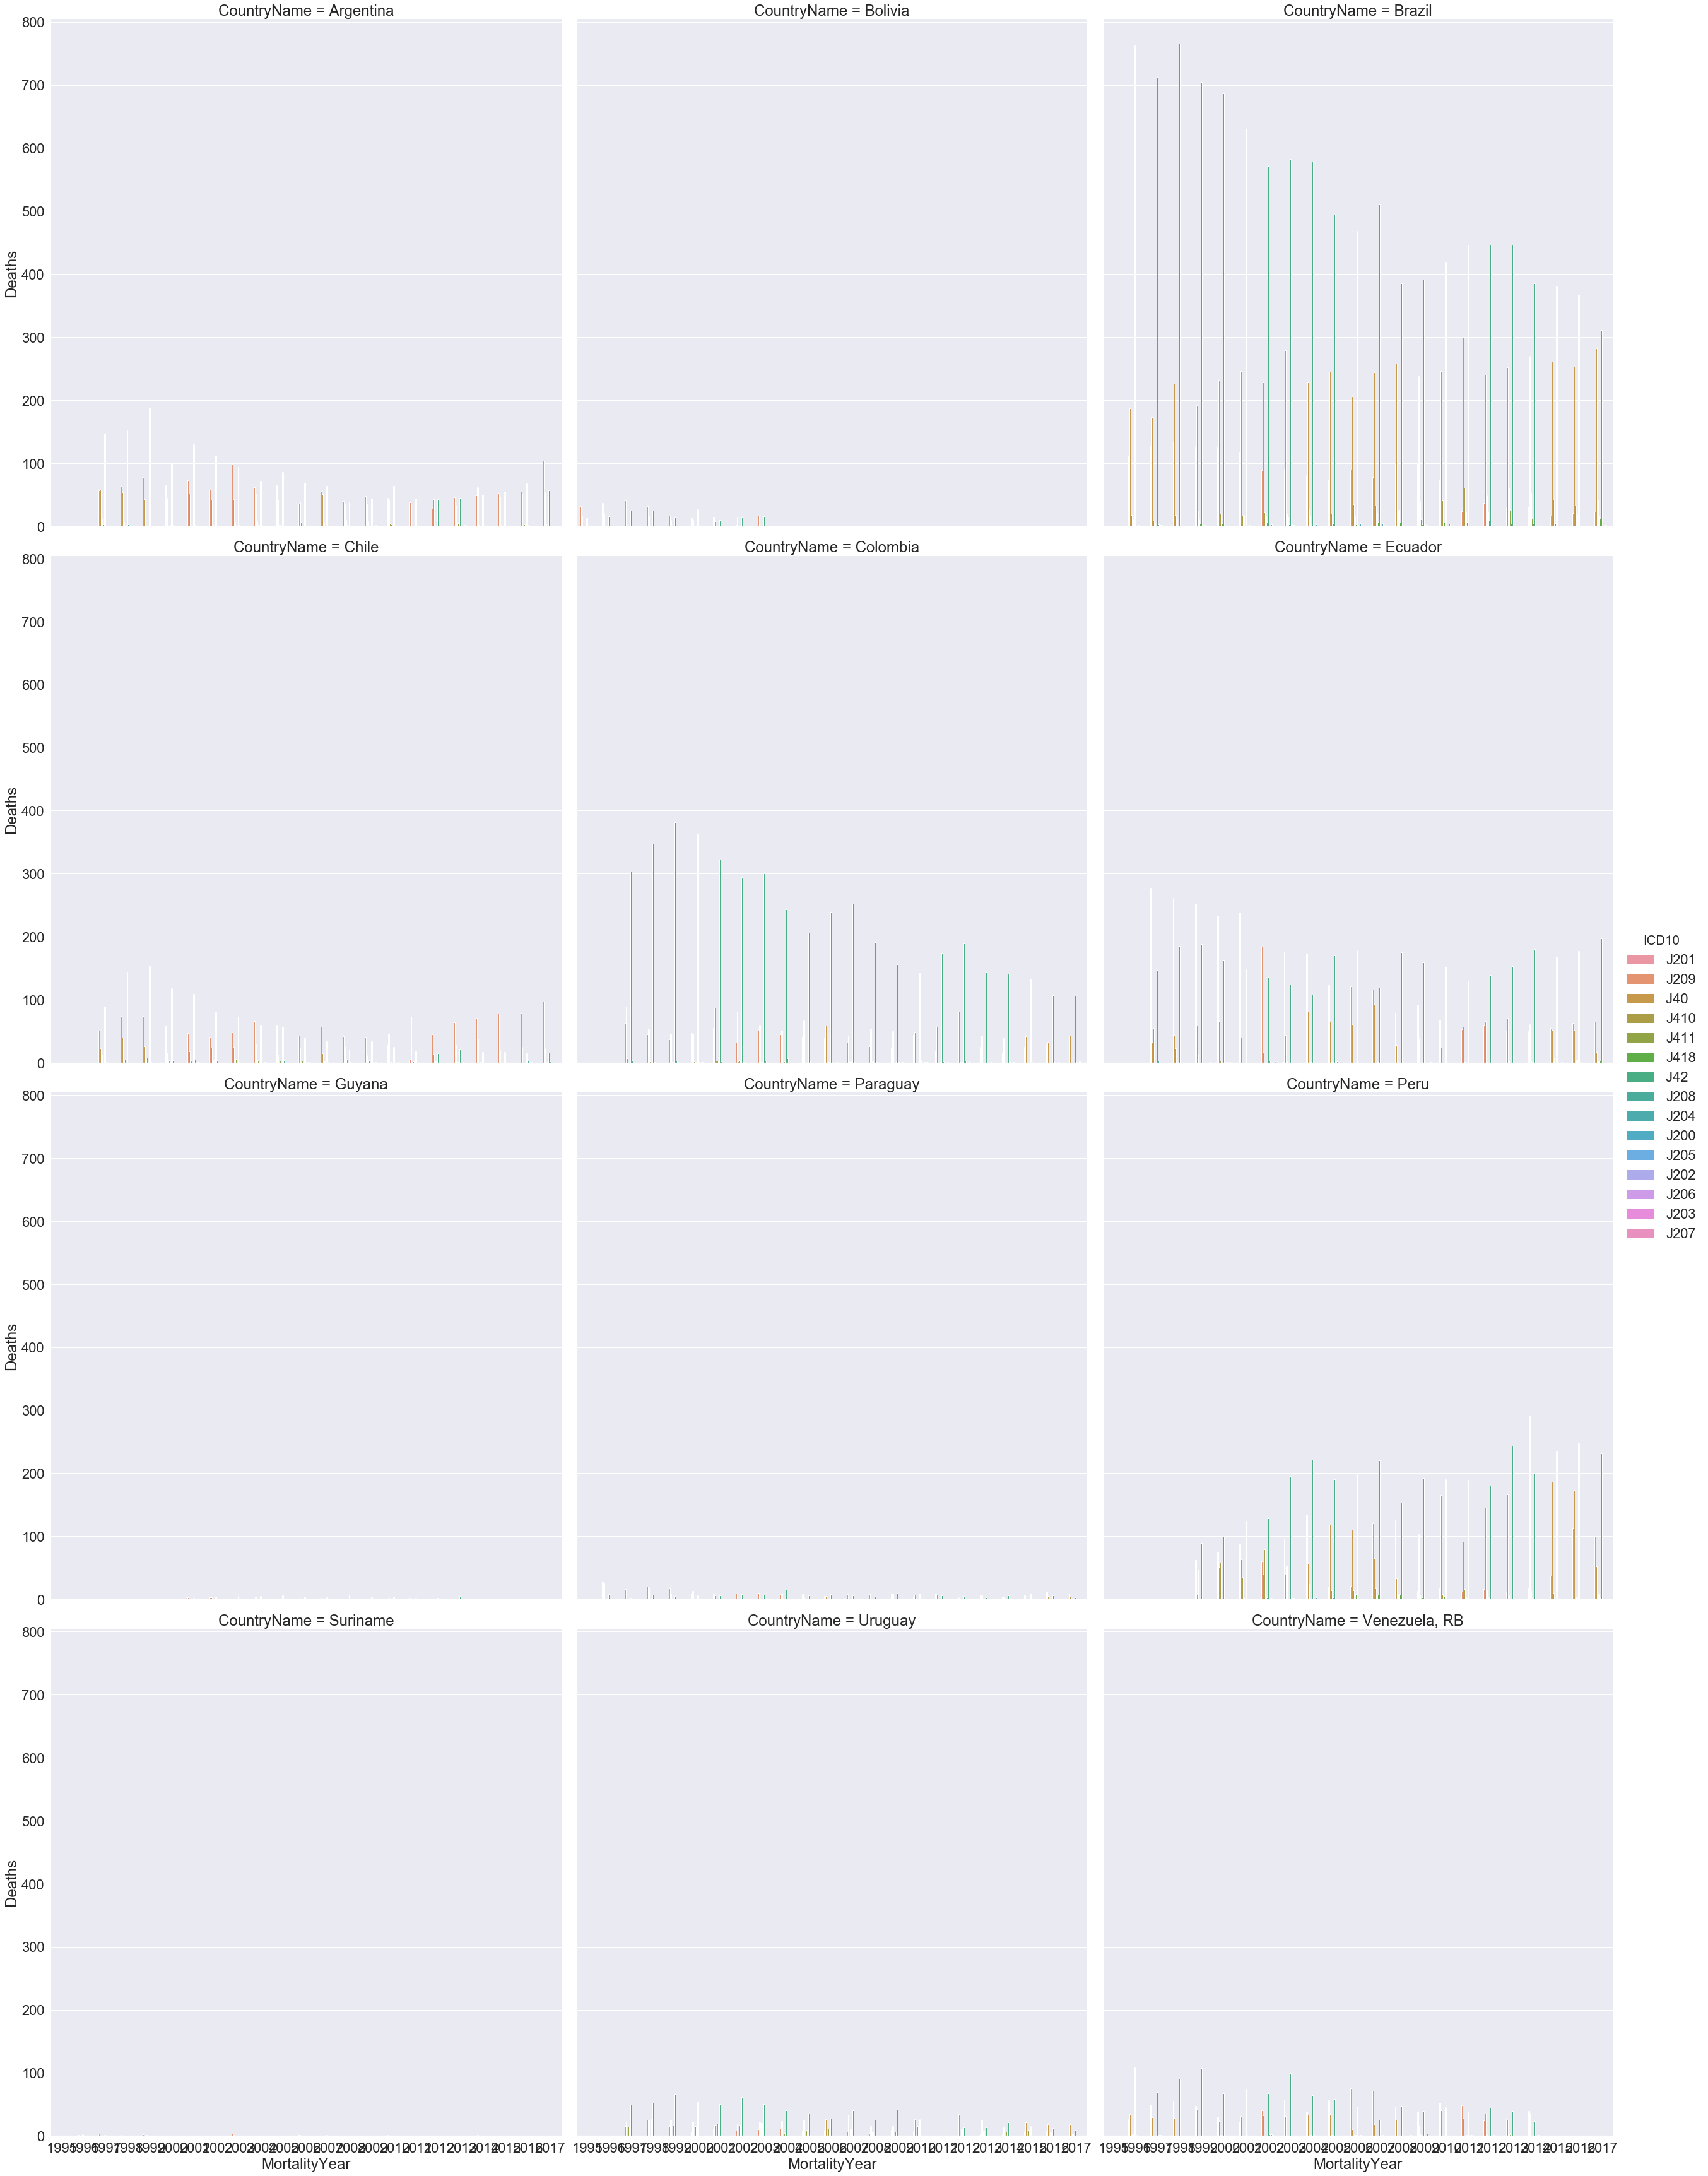

In [7]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="ICD10", col="CountryName",
            data=df_SouthAmerica_Bronchitis, kind="bar",
            height=12, col_wrap=3)

##### Tuberculosis for South America

In [11]:
df_SouthAmerica_Tuberculosis = df_SouthAmerica[df_SouthAmerica['Class']=="Tuberculosis"]
df_SouthAmerica_Tuberculosis.drop(['Gender', 'AgeGroupCode'], axis=1, inplace=True)
df_SouthAmerica_Tuberculosis = df_SouthAmerica_Tuberculosis.groupby(['CountryName', 'MortalityYear', 
                                                                 'ICD10', 'Class', 'Zone']) \
                                                                ['Deaths'].sum().reset_index()

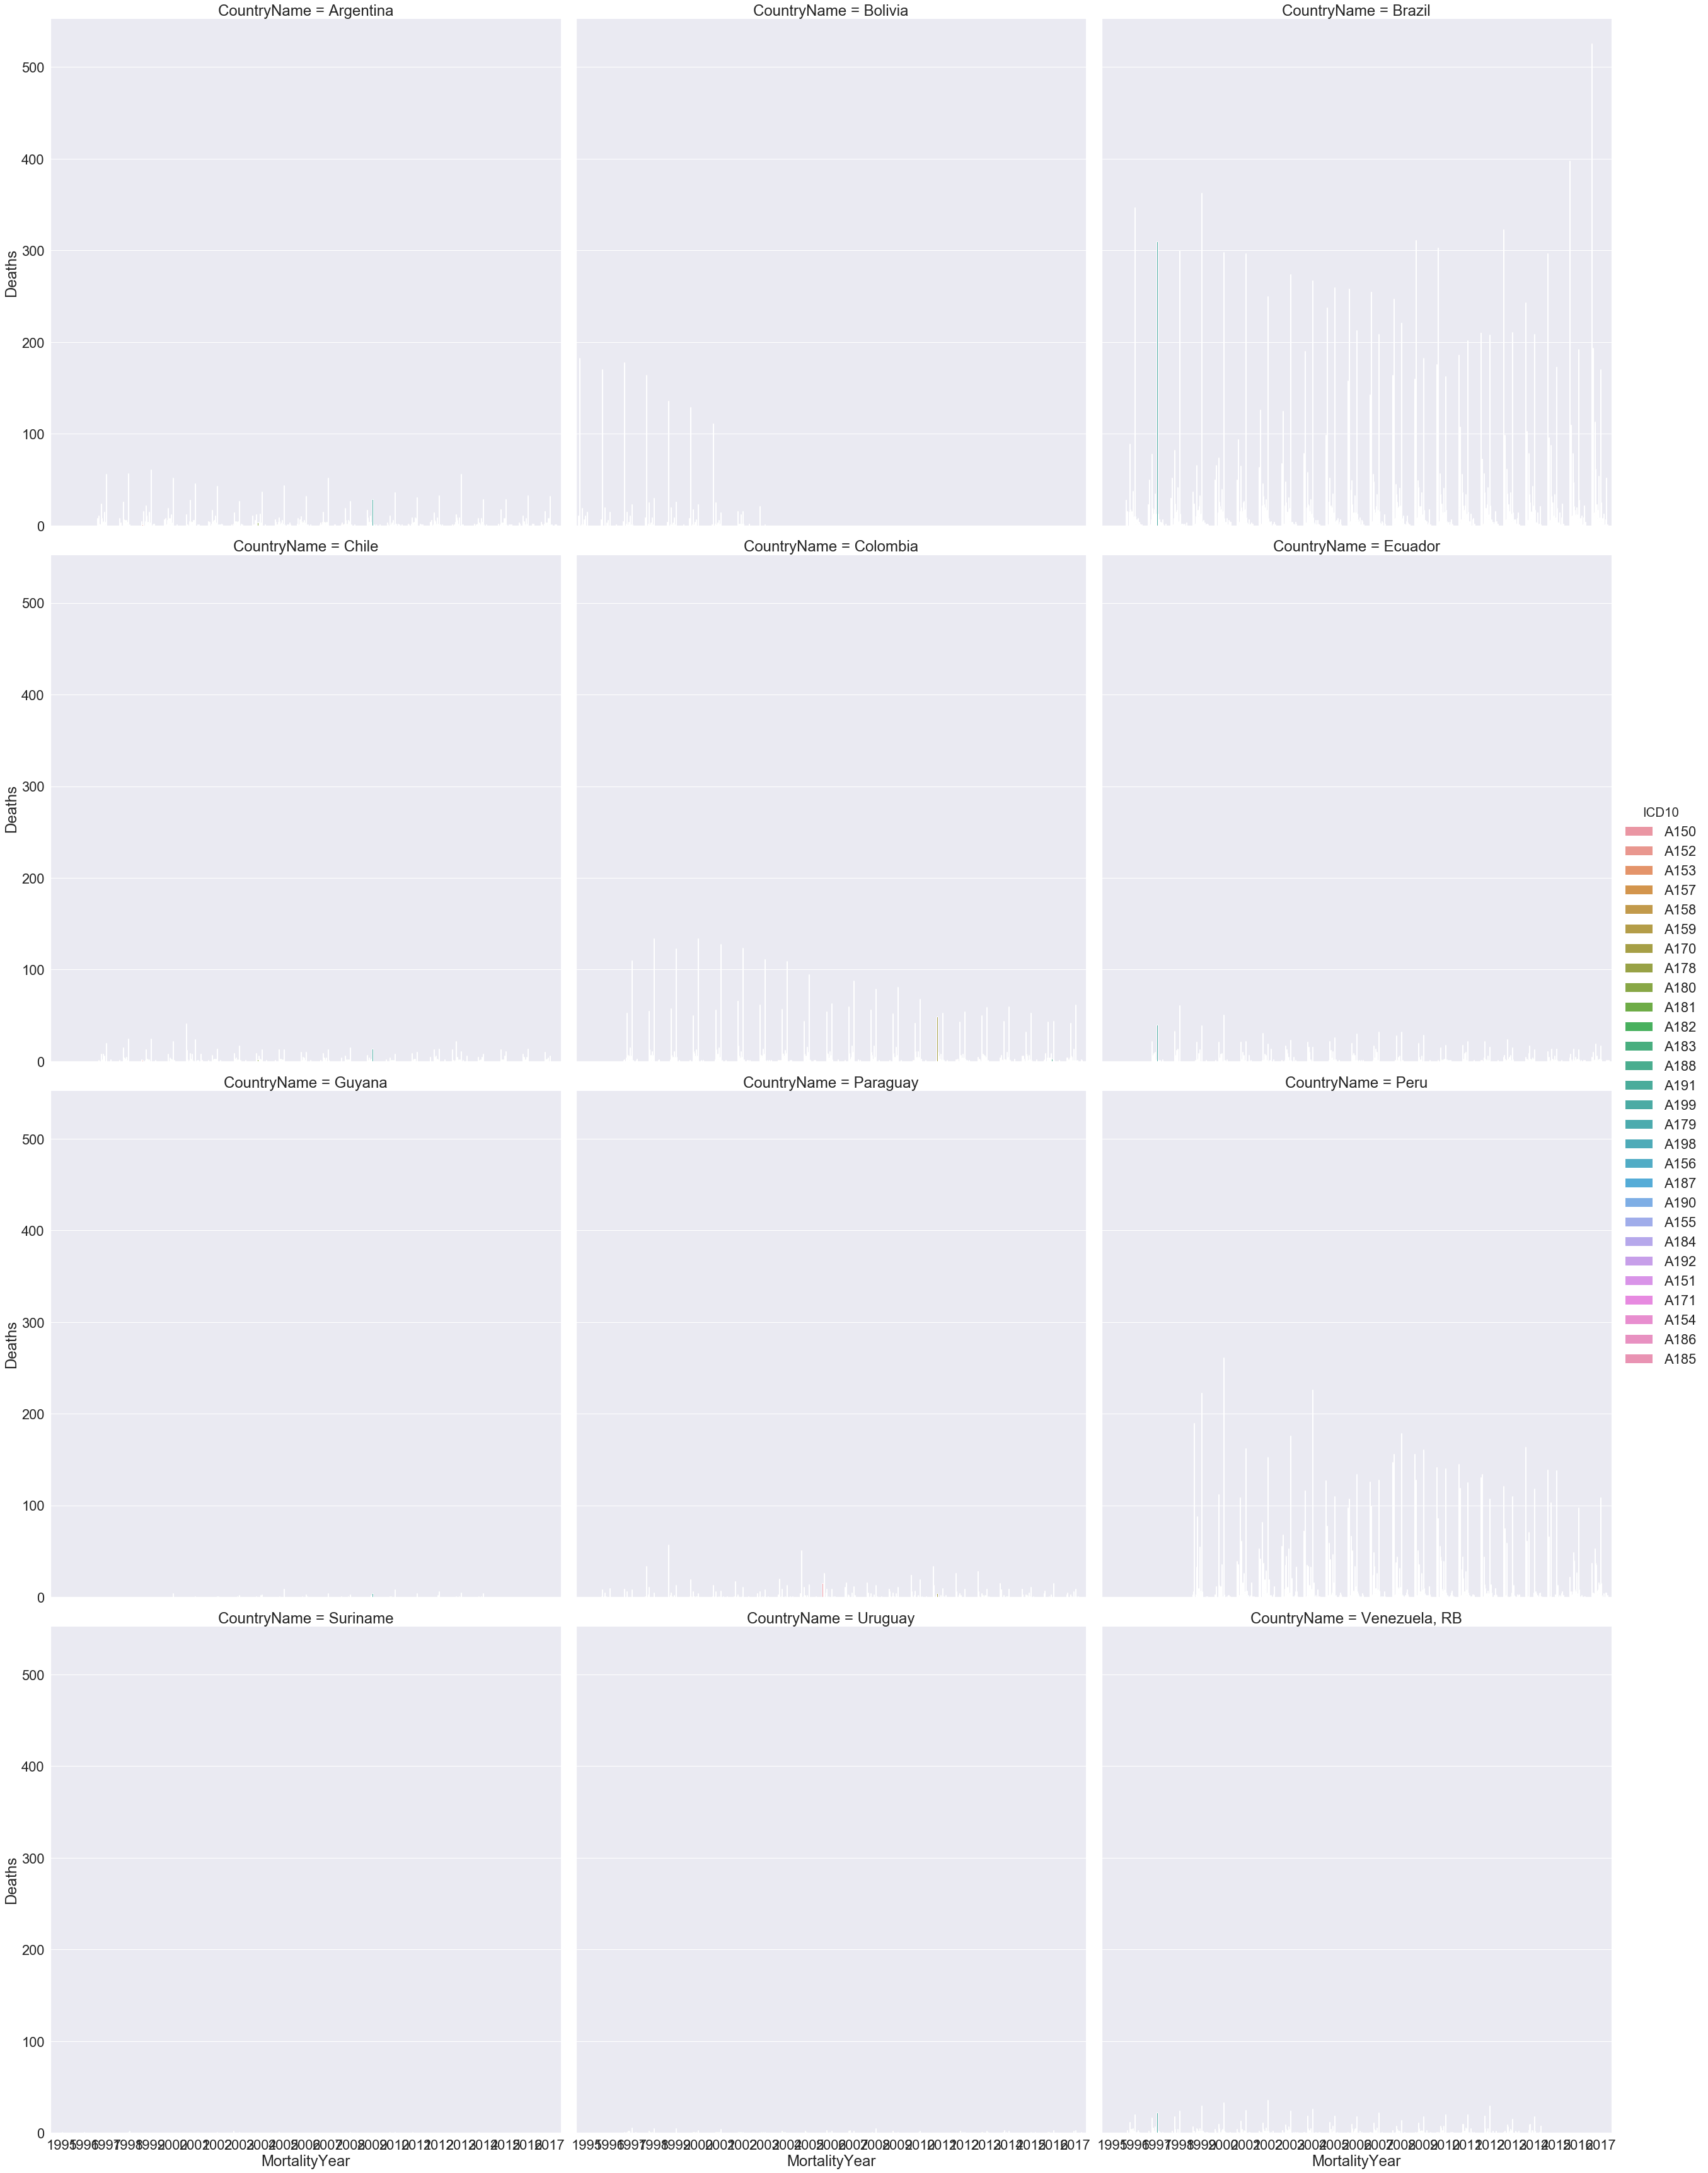

In [9]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="ICD10", col="CountryName",
            data=df_SouthAmerica_Tuberculosis, kind="bar",
            height=12, col_wrap=3)

##### No ICD10 for South America

In [16]:
df_SouthAmerica_temp = df_SouthAmerica.copy()
df_SouthAmerica_temp.drop(['Gender', 'AgeGroupCode', 'ICD10'], axis=1, inplace=True)
df_SouthAmerica_noICD = df_SouthAmerica_temp.groupby(['CountryName', 'MortalityYear', 
                                                      'Class', 'Zone'])['Deaths'].sum().reset_index()

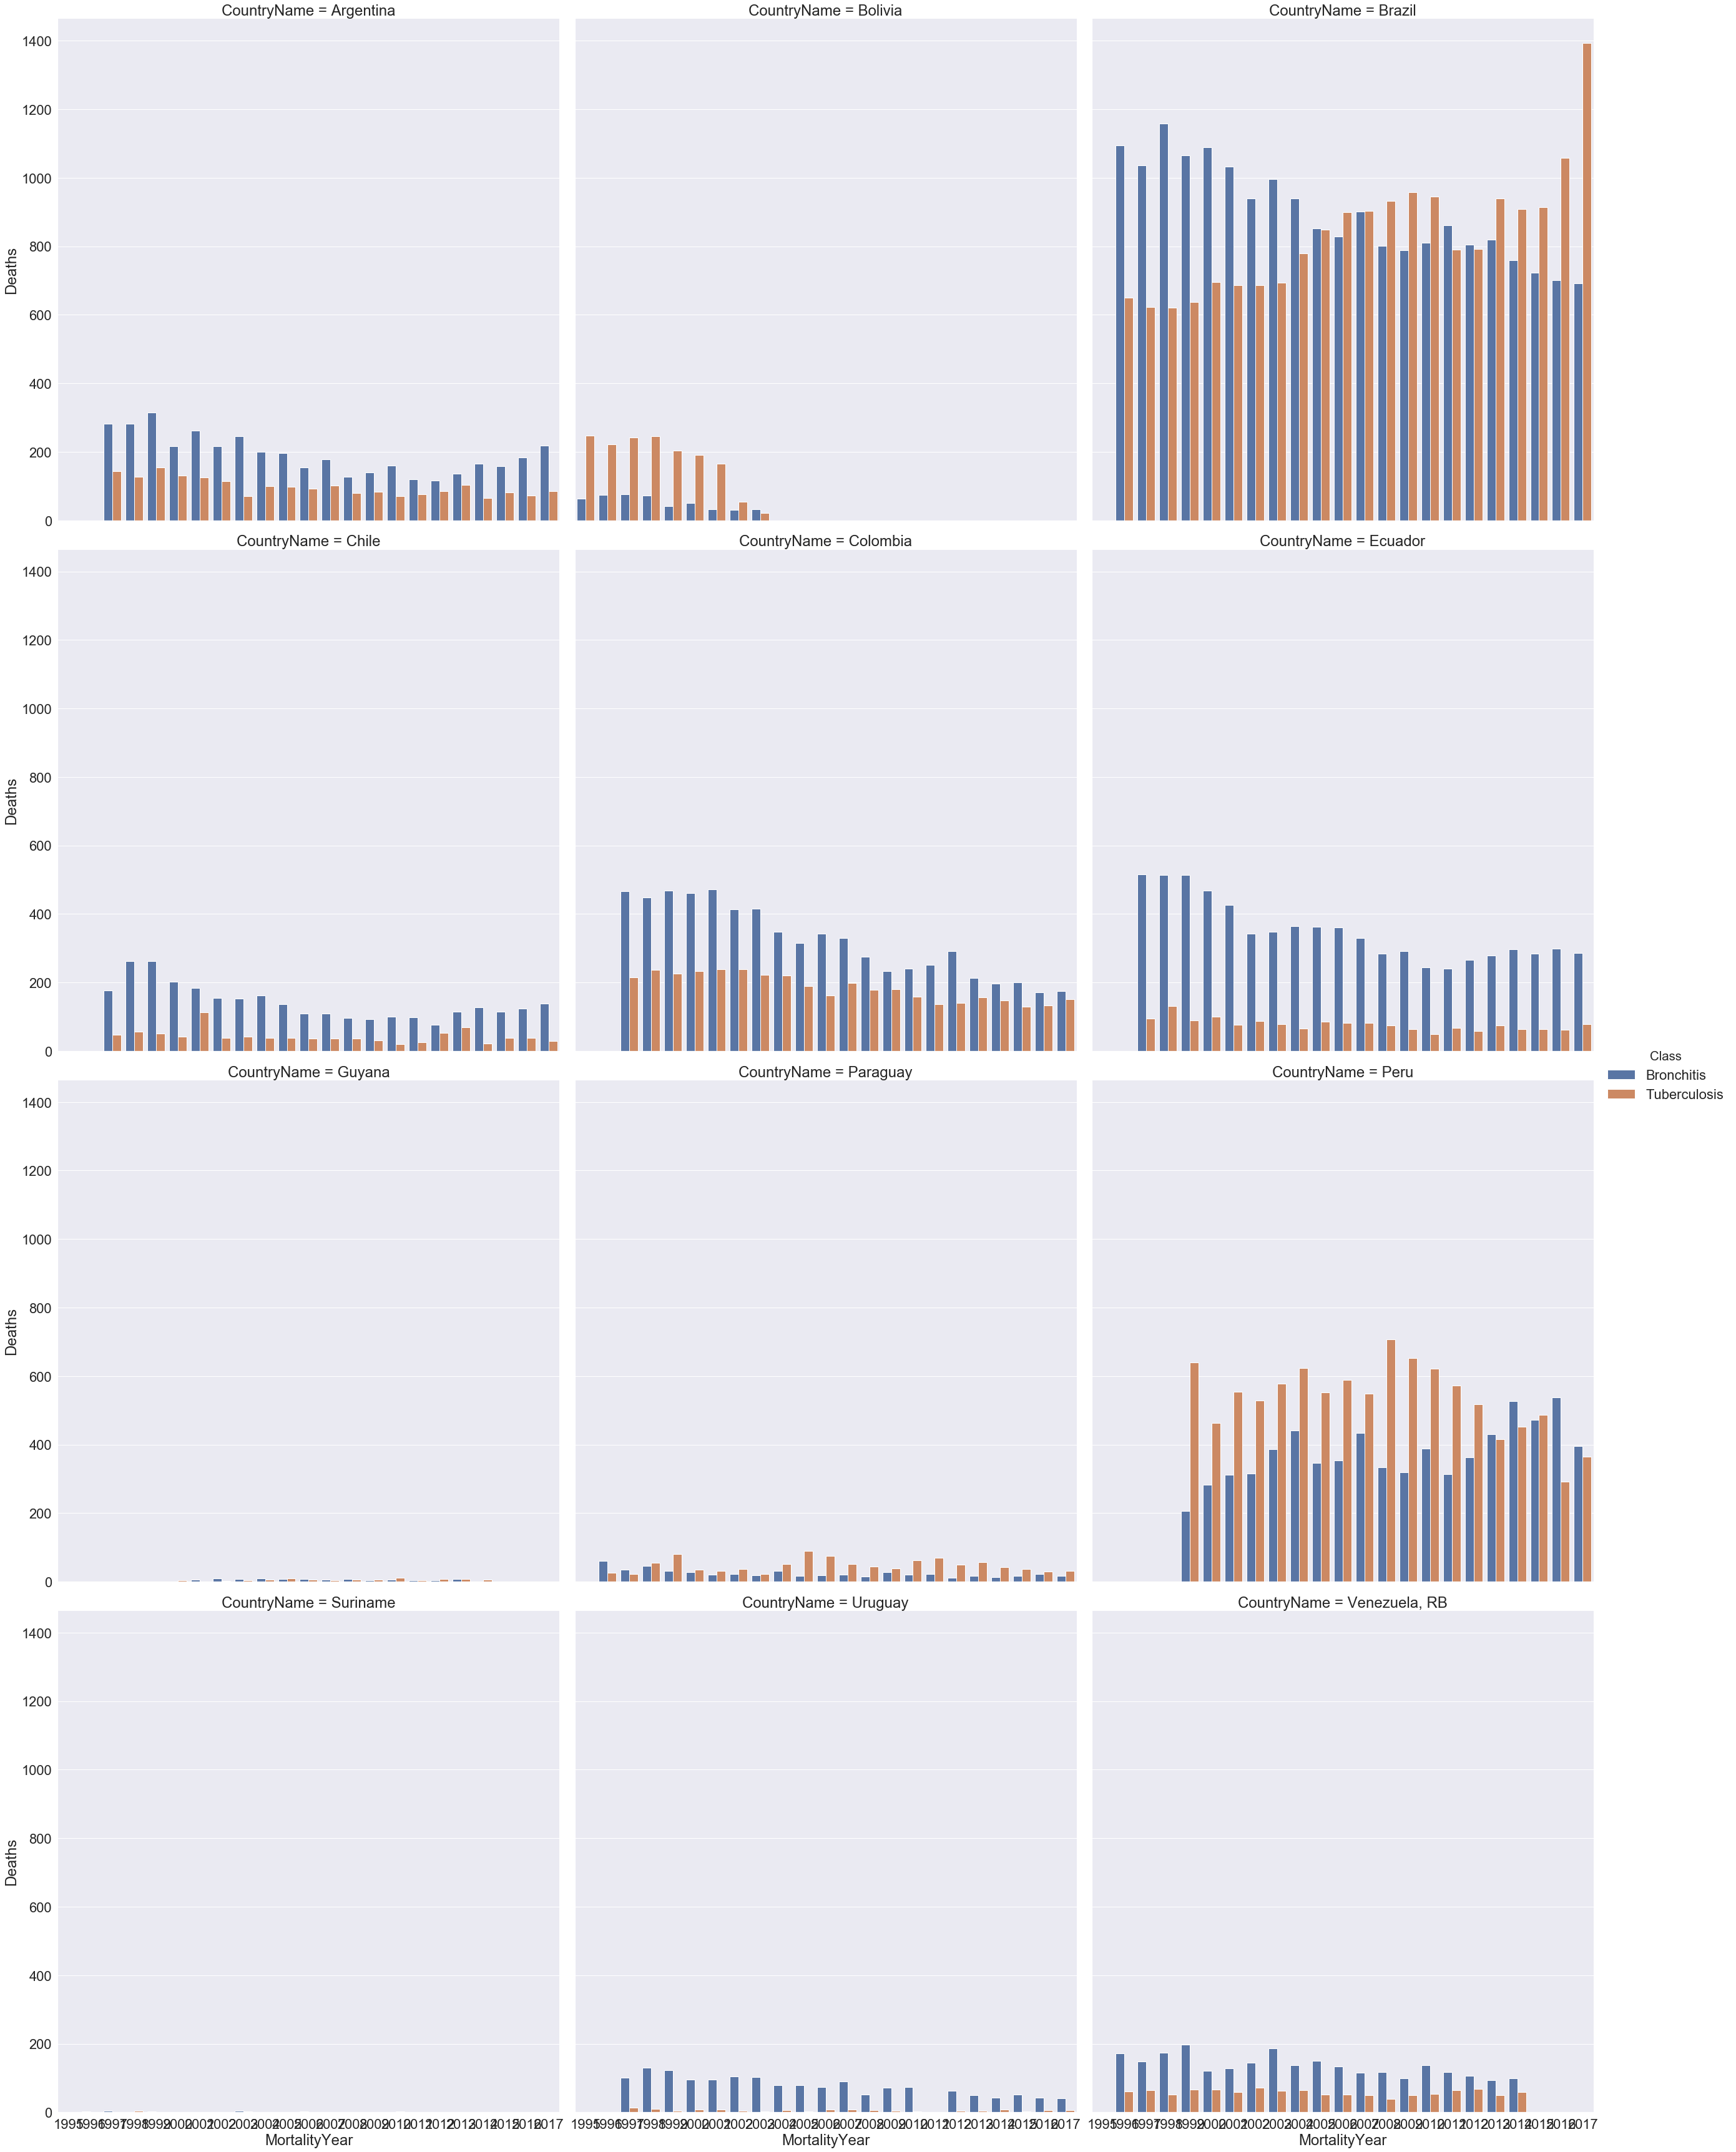

In [11]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="Class", col="CountryName",
            data=df_SouthAmerica_noICD, kind="bar",
            height=12, col_wrap=3)

As you can see, looking at the ICD10 codes seperately, we tend to lose a lot of data points. However, if we were to look at this without the ICD10 codes, we tend to get a lot more information that can be used for prediction algorithms. Inspite of this, there are some countries that do not have any data at all. We will filter out only those countries of interest.

Countries we will predict -
1. Brazil
2. Colombia
3. Argentina
4. Ecuador
5. Peru

#### For North America

In [12]:
df_NorthernAmerica = df[df['Zone'] == "NorthernAmerica"]
df_NorthernAmerica.head()

,CountryName,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths,Class,Zone
37,United States,2017,Male,23,J208,1,Bronchitis,NorthernAmerica
38,United States,2017,Male,23,J411,1,Bronchitis,NorthernAmerica
39,United States,2017,Male,24,J201,1,Bronchitis,NorthernAmerica
40,United States,2017,Male,18,J40,1,Bronchitis,NorthernAmerica
41,United States,2017,Male,18,J42,1,Bronchitis,NorthernAmerica


##### Bronchitis for North America

In [13]:
df_NorthernAmerica_Bronchitis = df_NorthernAmerica[df_NorthernAmerica['Class']=="Bronchitis"]
df_NorthernAmerica_Bronchitis.drop(['Gender', 'AgeGroupCode'], axis=1, inplace=True)
df_NorthernAmerica_Bronchitis = df_NorthernAmerica_Bronchitis.groupby(['CountryName', 'MortalityYear', 
                                                                 'ICD10', 'Class', 'Zone']) \
                                                                ['Deaths'].sum().reset_index()

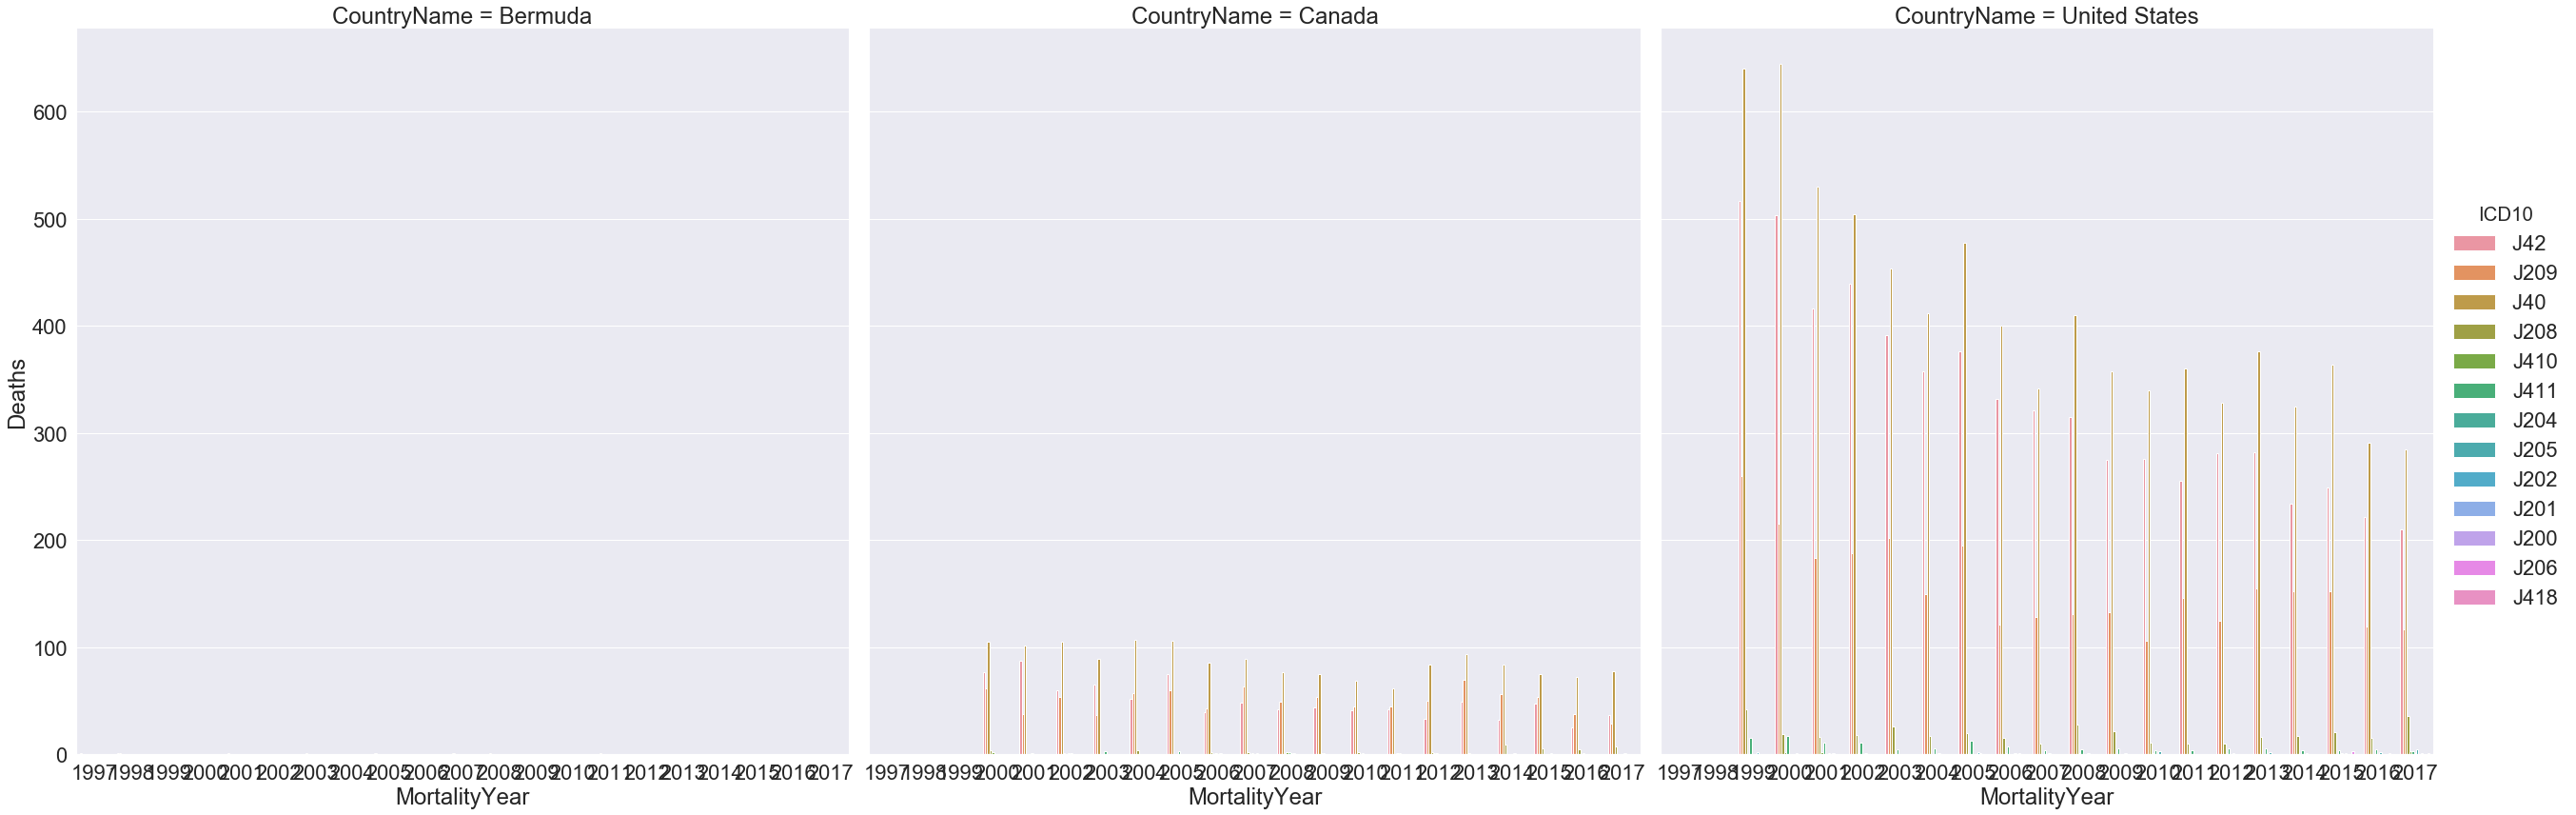

In [14]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="ICD10", col="CountryName",
            data=df_NorthernAmerica_Bronchitis, kind="bar",
            height=12, col_wrap=3)

##### Tuberculosis for North America

In [15]:
df_NorthernAmerica_Tuberculosis = df_NorthernAmerica[df_NorthernAmerica['Class']=="Tuberculosis"]
df_NorthernAmerica_Tuberculosis.drop(['Gender', 'AgeGroupCode'], axis=1, inplace=True)
df_NorthernAmerica_Tuberculosis = df_NorthernAmerica_Tuberculosis.groupby(['CountryName', 'MortalityYear', 
                                                                 'ICD10', 'Class', 'Zone']) \
                                                                ['Deaths'].sum().reset_index()

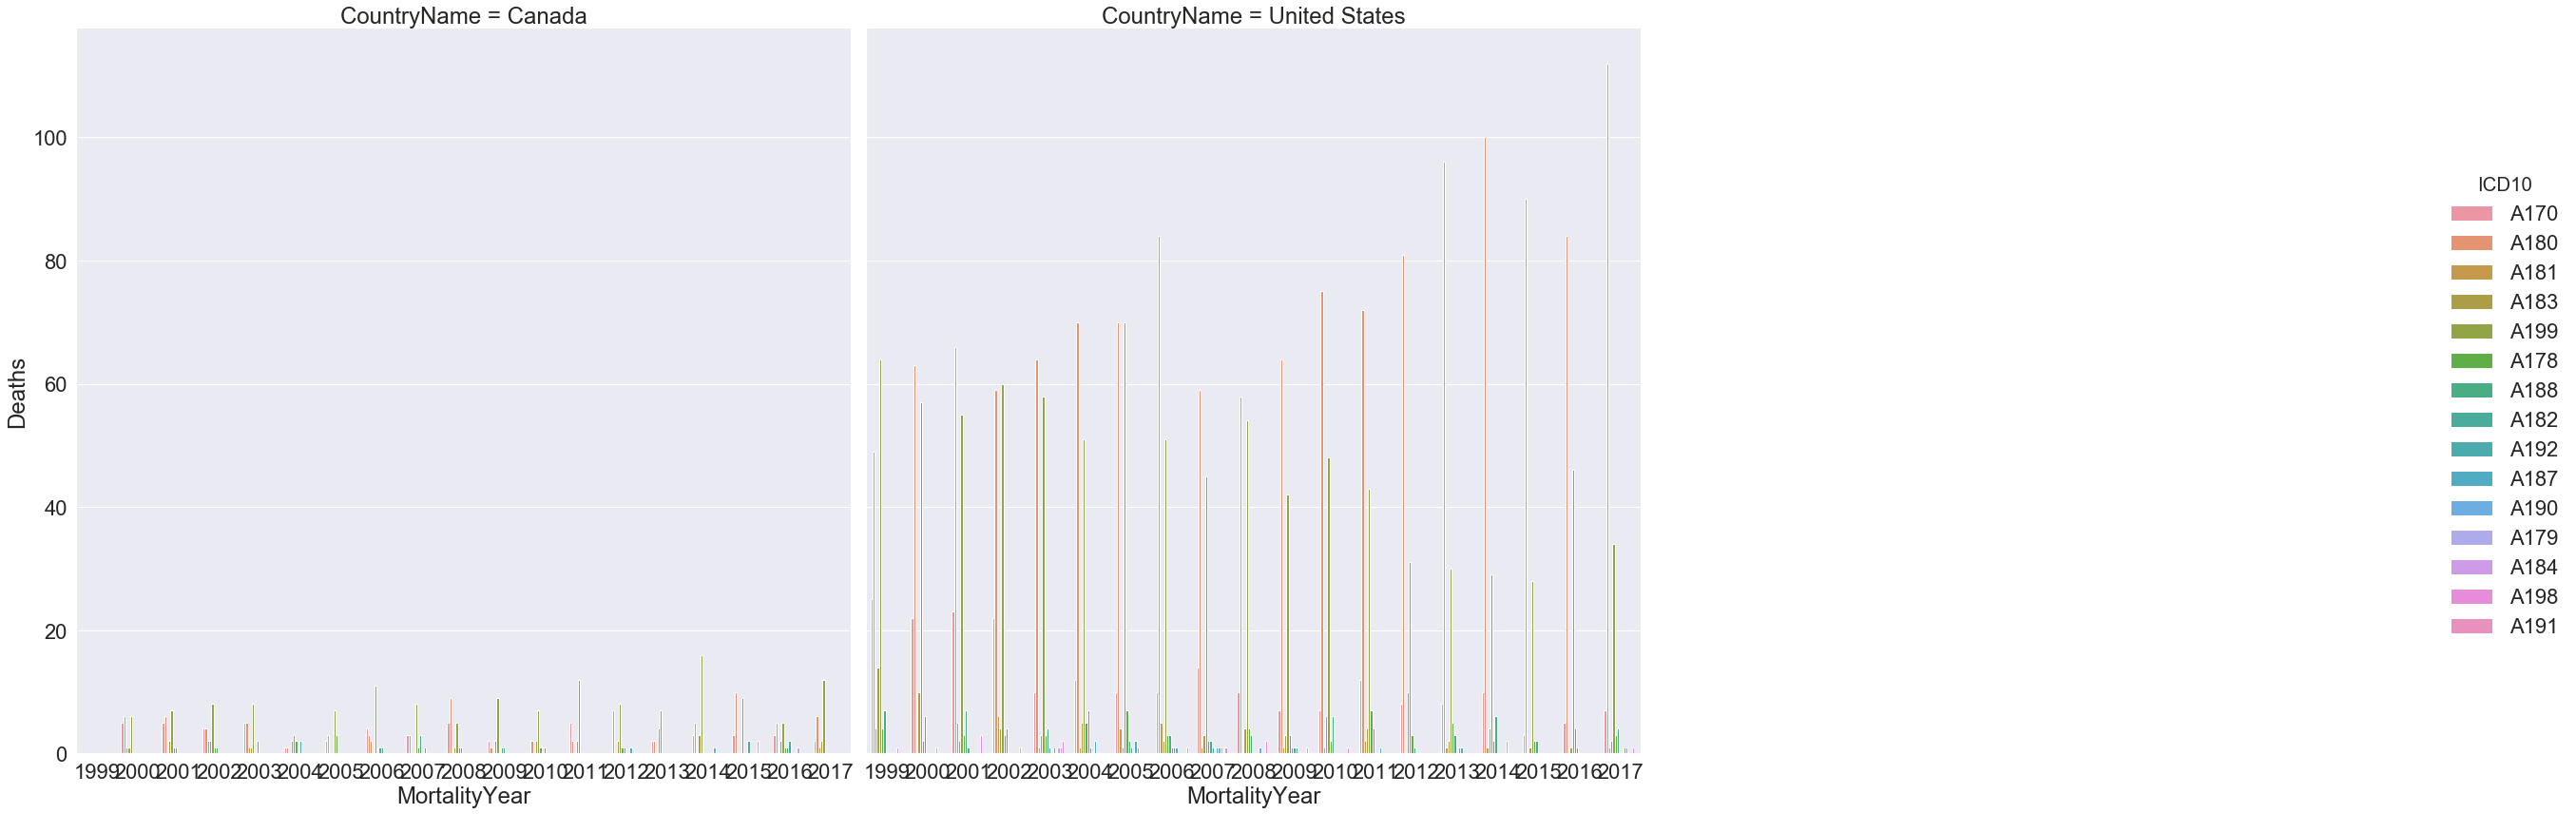

In [16]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="ICD10", col="CountryName",
            data=df_NorthernAmerica_Tuberculosis, kind="bar",
            height=12, col_wrap=3)

##### No ICD10 for North America

In [17]:
df_NorthernAmerica_temp = df_NorthernAmerica.copy()
df_NorthernAmerica_temp.drop(['Gender', 'AgeGroupCode', 'ICD10'], axis=1, inplace=True)
df_NorthernAmerica_noICD = df_NorthernAmerica_temp.groupby(['CountryName', 'MortalityYear', 
                                                      'Class', 'Zone'])['Deaths'].sum().reset_index()

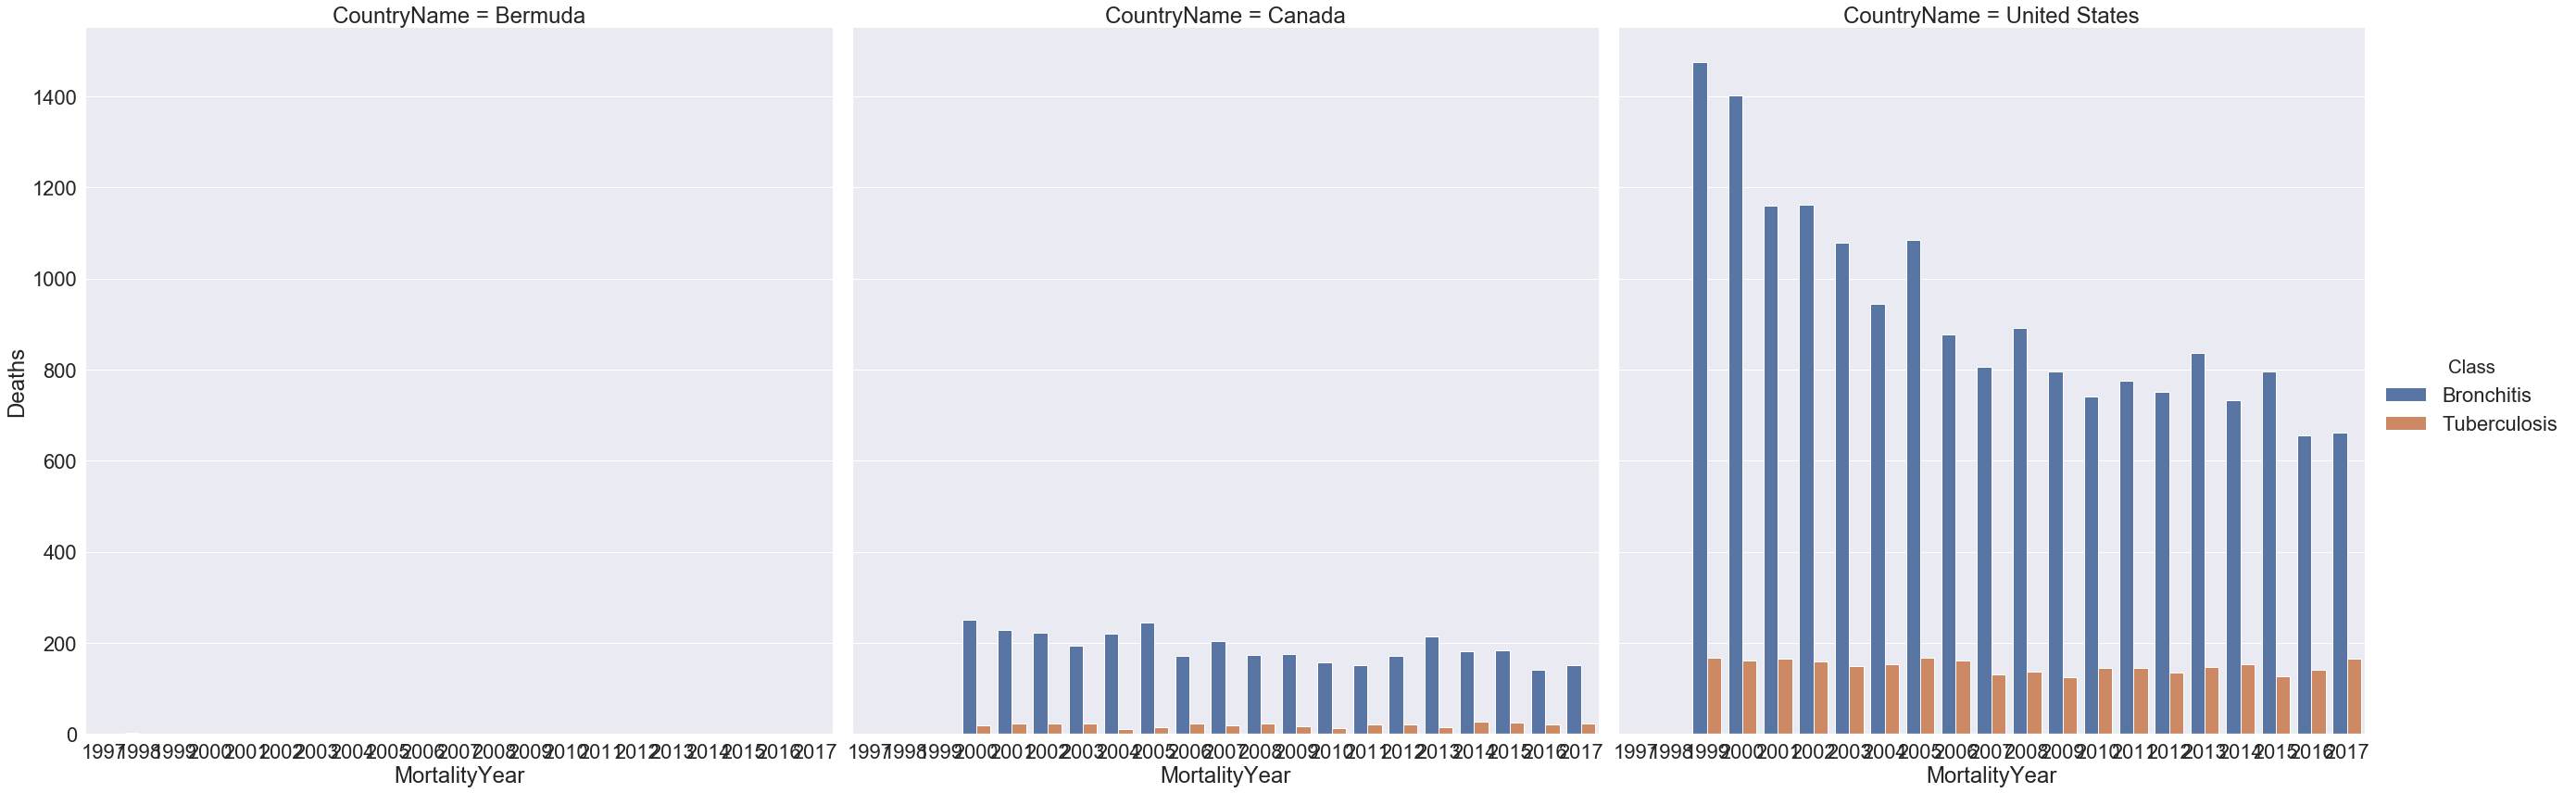

In [18]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="Class", col="CountryName",
            data=df_NorthernAmerica_noICD, kind="bar",
            height=12, col_wrap=3)

As you can see, looking at the ICD10 codes seperately, we tend to lose a lot of data points. However, if we were to look at this without the ICD10 codes, we tend to get a lot more information that can be used for prediction algorithms. Inspite of this, there are some countries that do not have any data at all. We will filter out only those countries of interest.

Countries we will predict -

1. Canada
2. United States

#### For Central America

In [19]:
df_CentralAmerica = df[df['Zone'] == "CentralAmerica"]
df_CentralAmerica.head()

,CountryName,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths,Class,Zone
18,Mexico,2017,Male,9,J209,1,Bronchitis,CentralAmerica
19,Mexico,2017,Male,7,J42,1,Bronchitis,CentralAmerica
20,Mexico,2017,Male,10,J42,1,Bronchitis,CentralAmerica
21,Mexico,2017,Male,5,J42,1,Bronchitis,CentralAmerica
22,Mexico,2017,Male,11,J42,1,Bronchitis,CentralAmerica


##### Bronchitis for Central America

In [20]:
df_CentralAmerica_Bronchitis = df_CentralAmerica[df_CentralAmerica['Class']=="Bronchitis"]
df_CentralAmerica_Bronchitis.drop(['Gender', 'AgeGroupCode'], axis=1, inplace=True)
df_CentralAmerica_Bronchitis = df_CentralAmerica_Bronchitis.groupby(['CountryName', 'MortalityYear', 
                                                                 'ICD10', 'Class', 'Zone']) \
                                                                ['Deaths'].sum().reset_index()

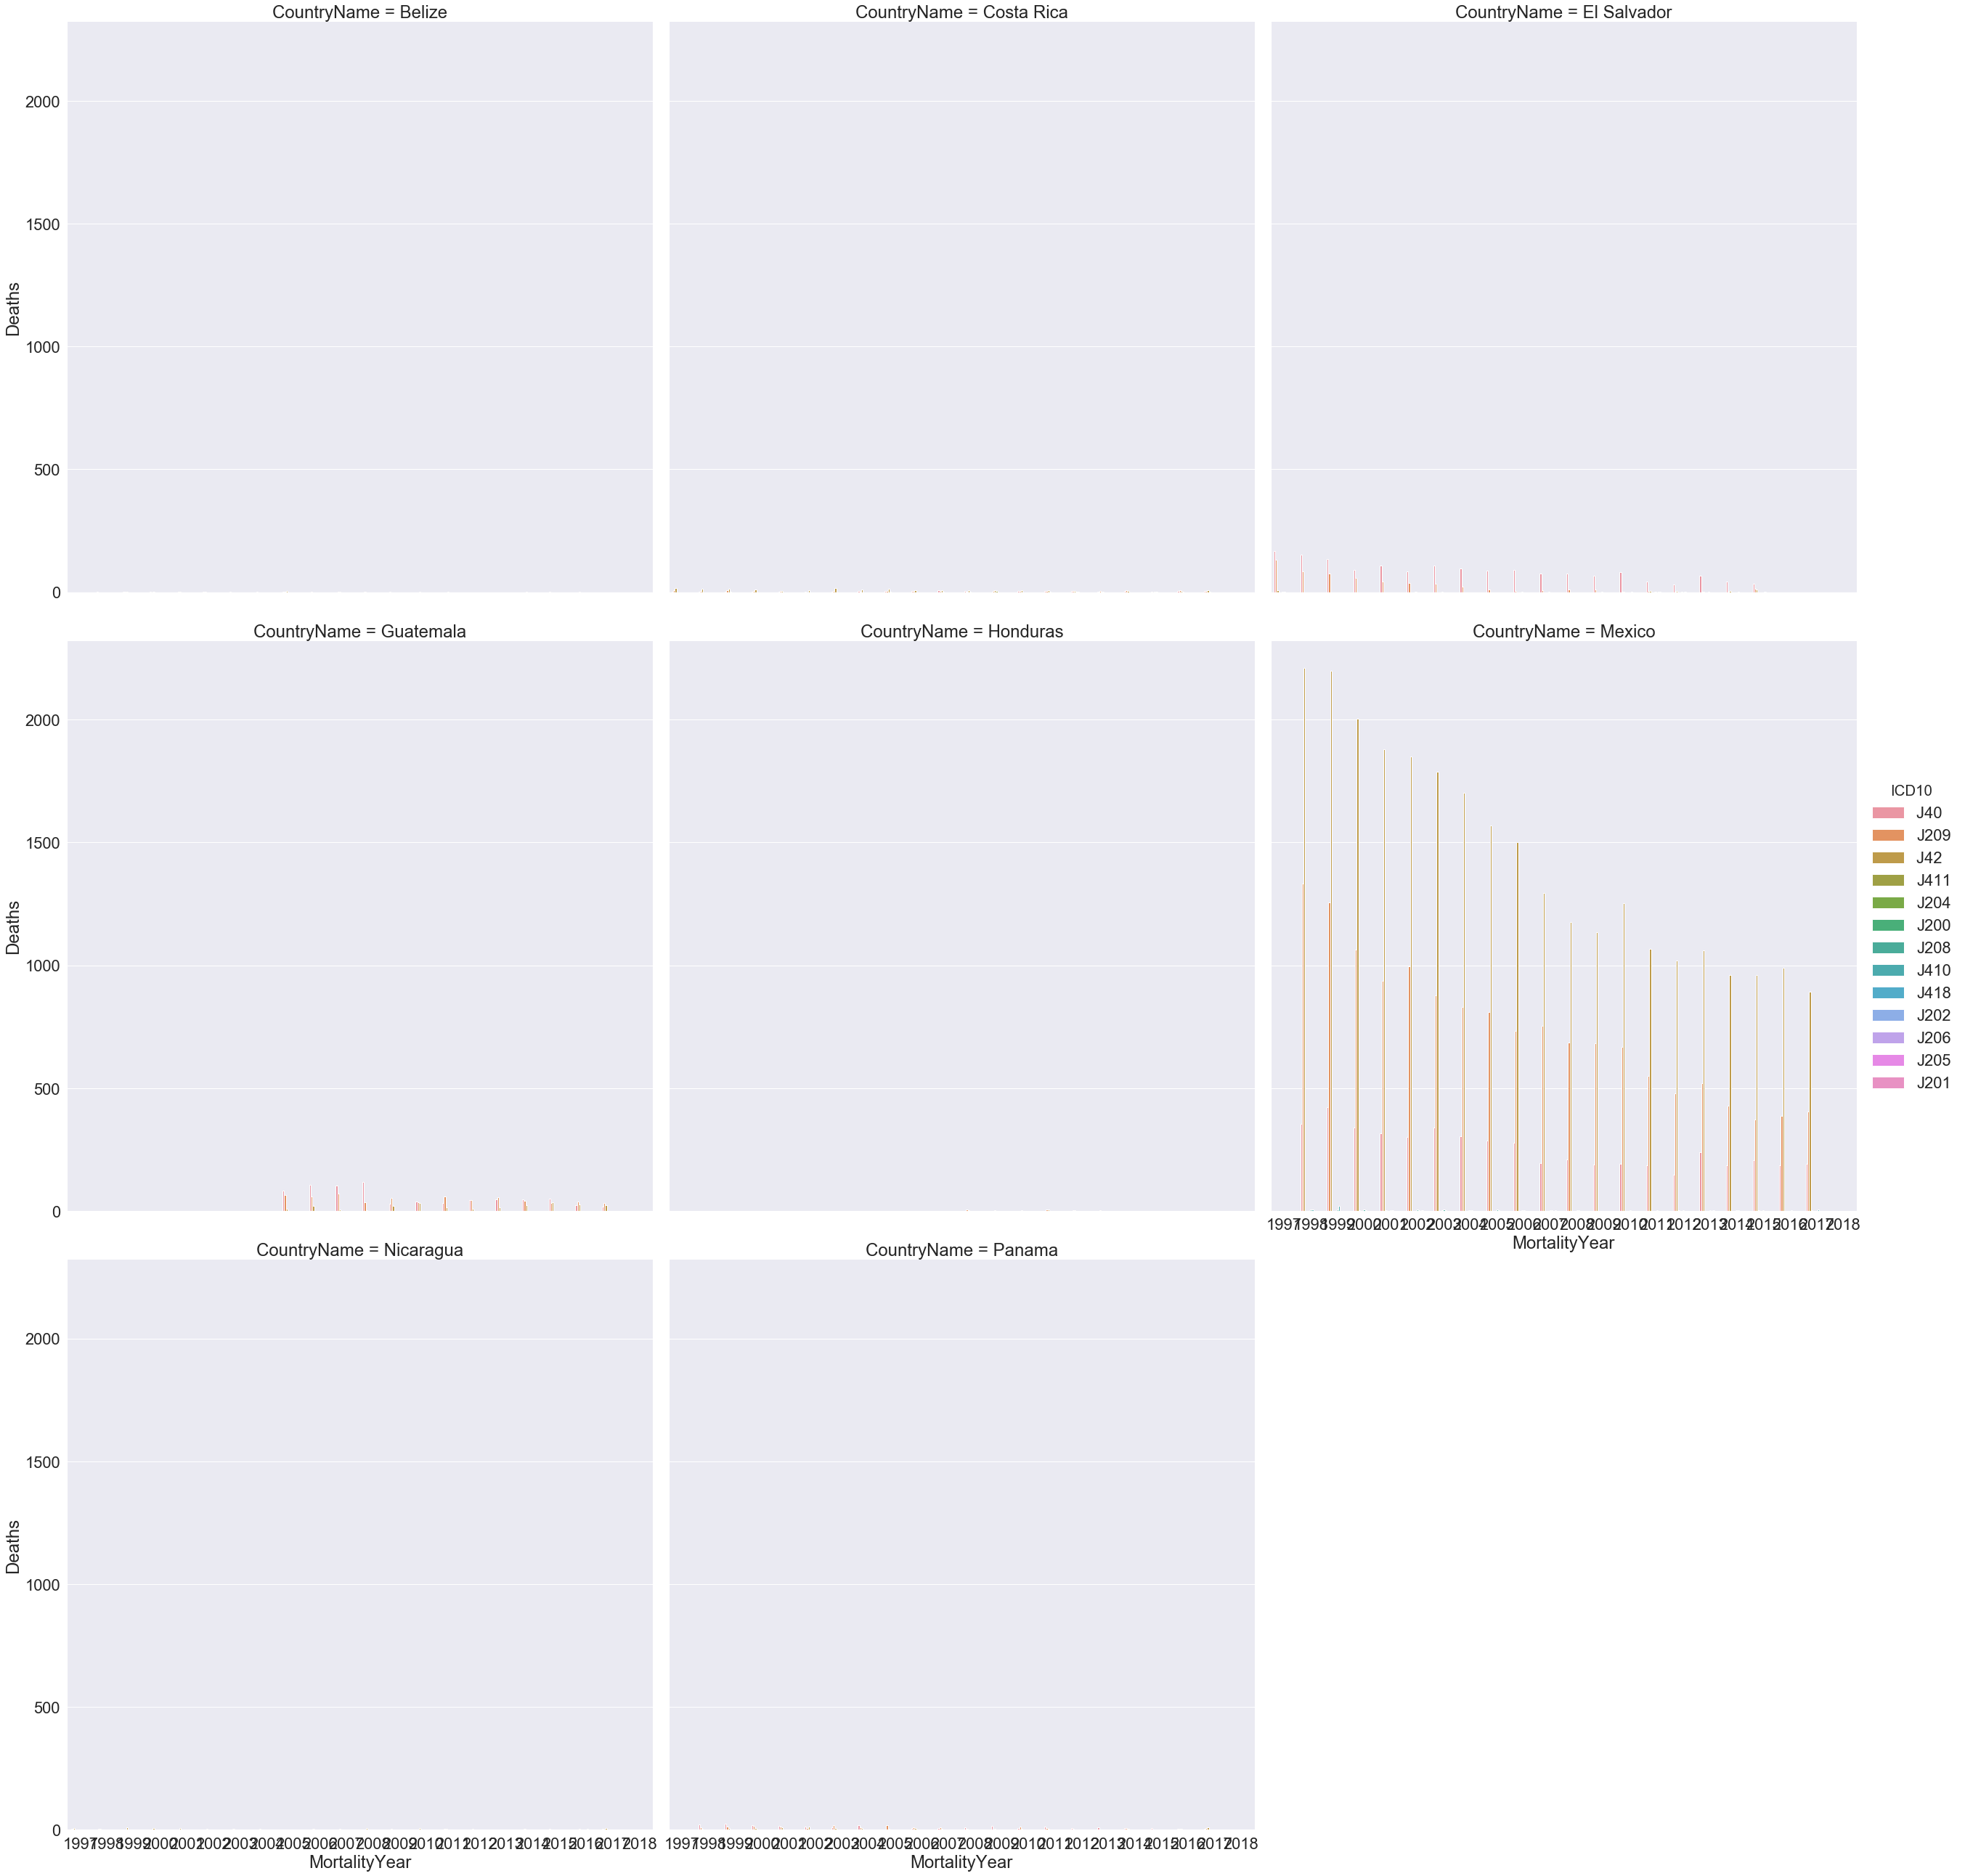

In [21]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="ICD10", col="CountryName",
            data=df_CentralAmerica_Bronchitis, kind="bar",
            height=12, col_wrap=3)

##### Tuberculosis for Central America

In [22]:
df_CentralAmerica_Tuberculosis = df_CentralAmerica[df_CentralAmerica['Class']=="Tuberculosis"]
df_CentralAmerica_Tuberculosis.drop(['Gender', 'AgeGroupCode'], axis=1, inplace=True)
df_CentralAmerica_Tuberculosis = df_CentralAmerica_Tuberculosis.groupby(['CountryName', 'MortalityYear', 
                                                                 'ICD10', 'Class', 'Zone']) \
                                                                ['Deaths'].sum().reset_index()

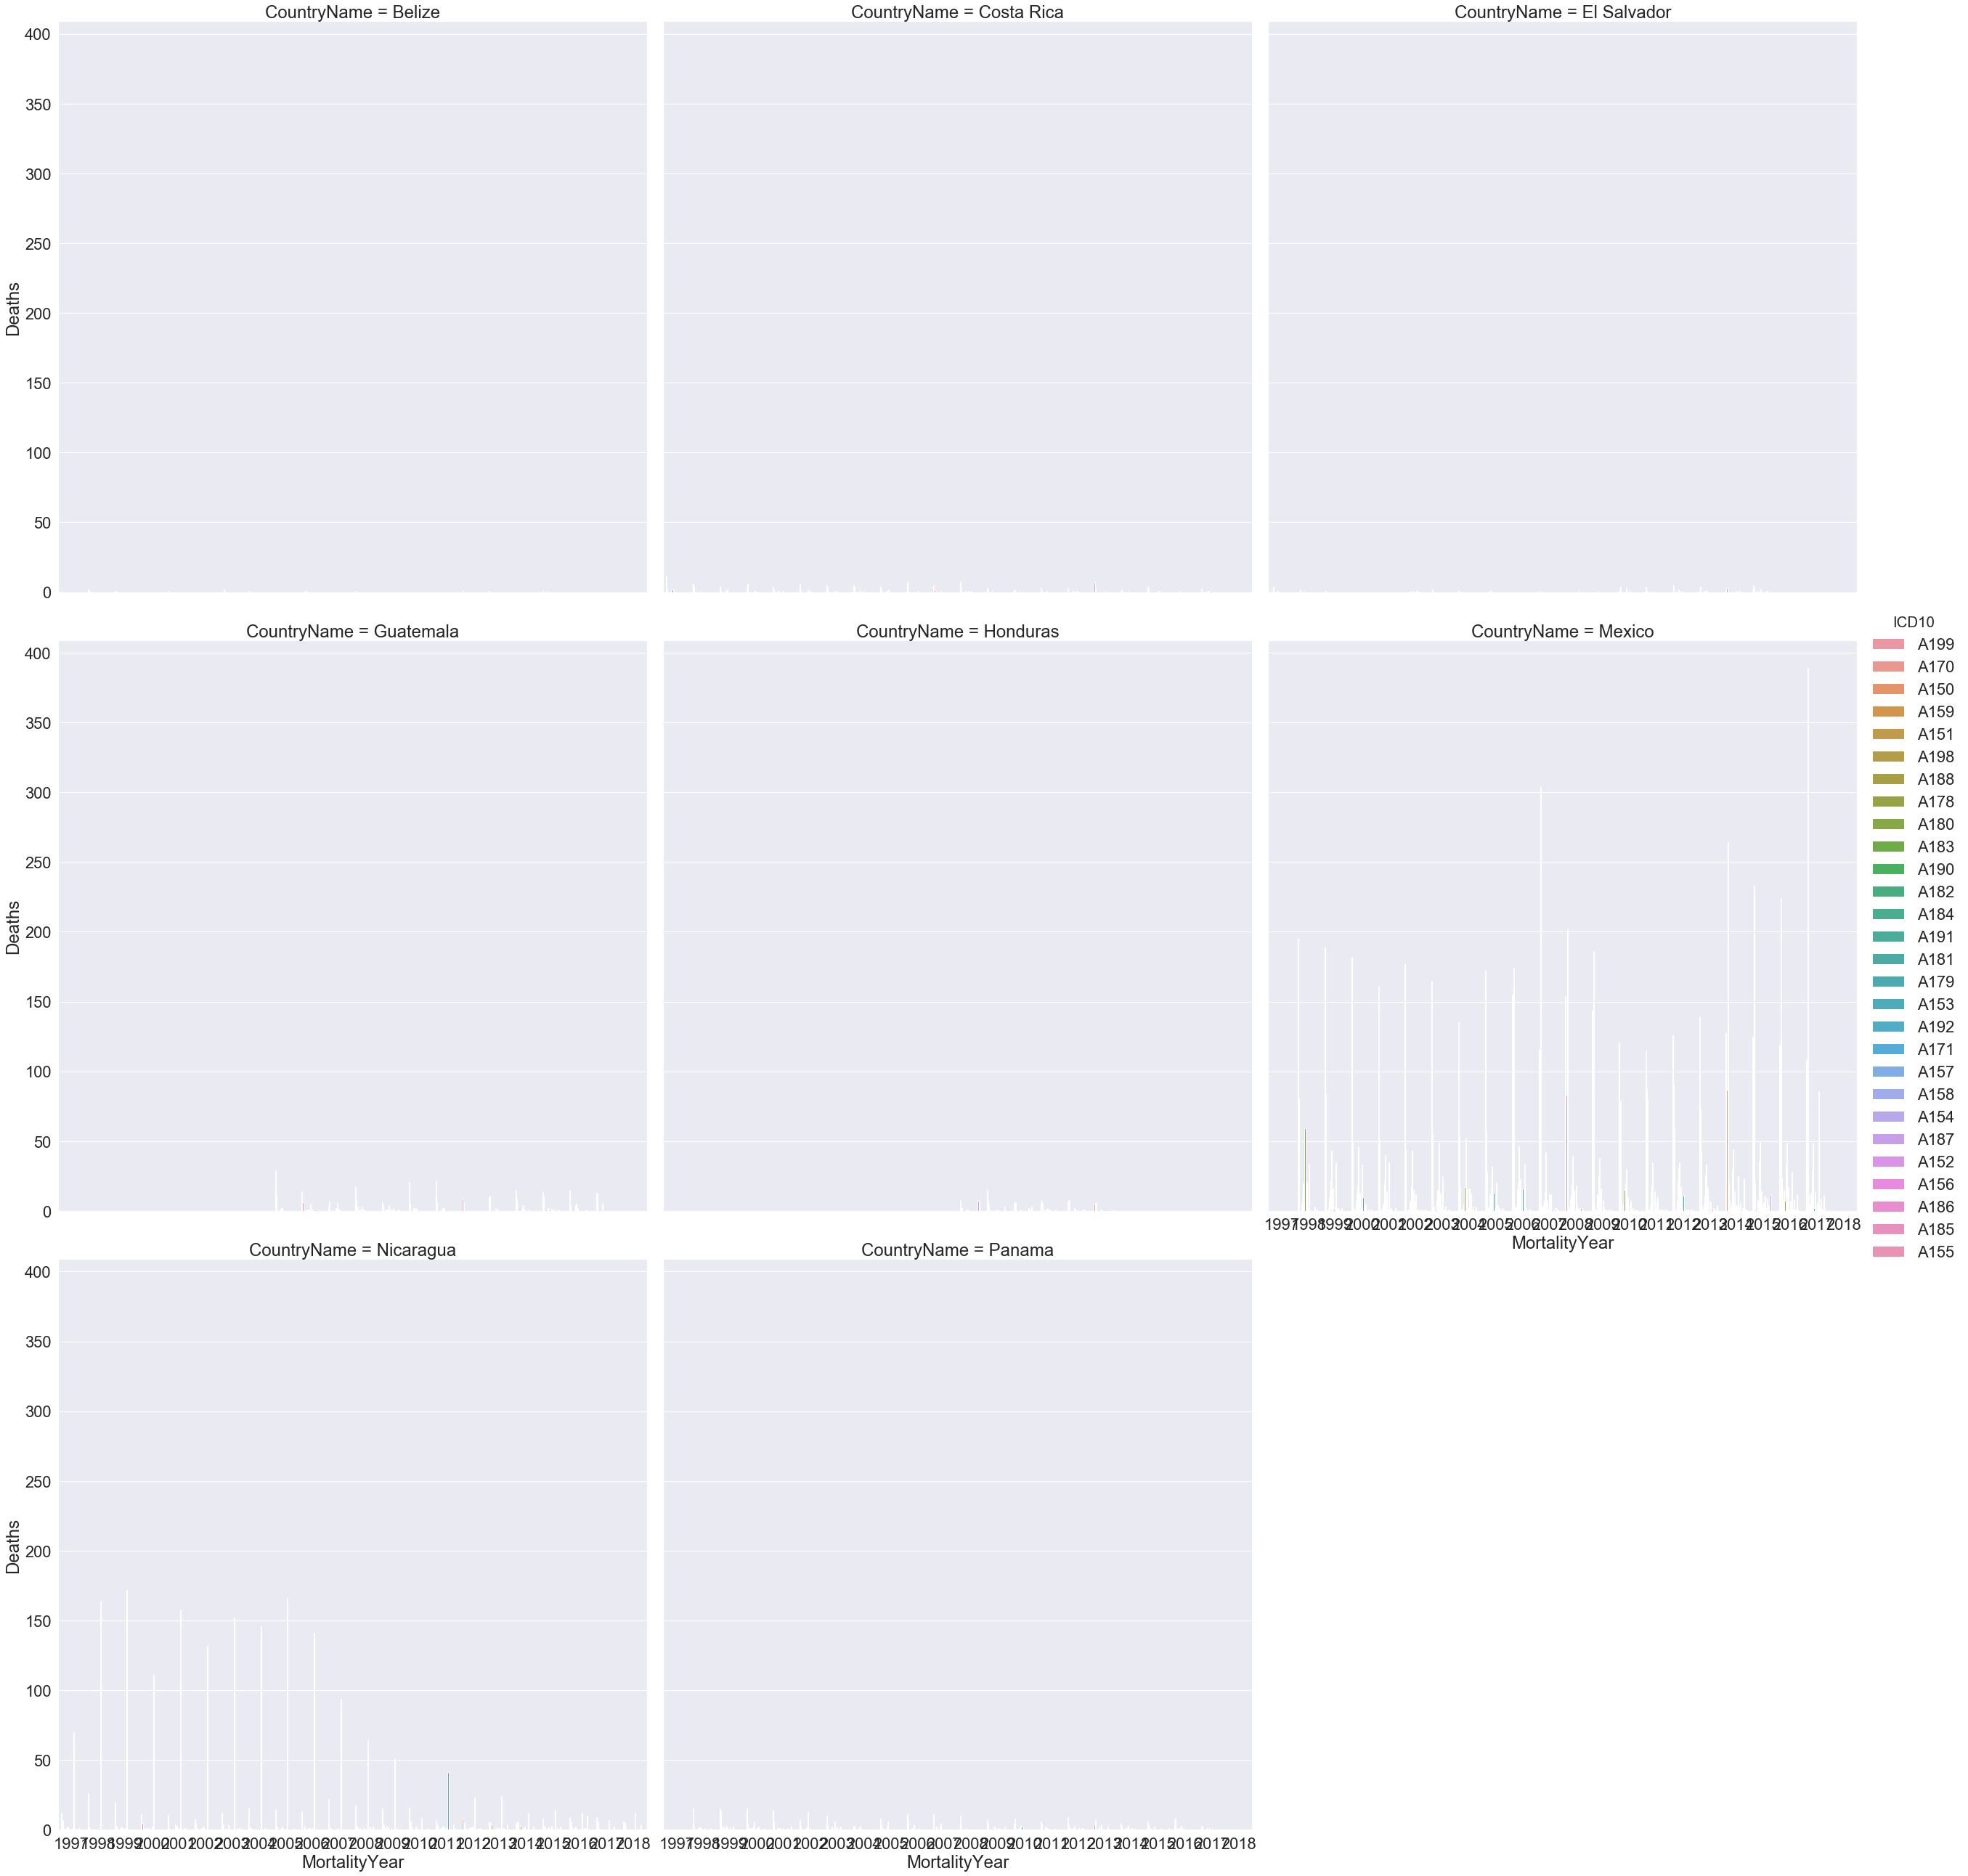

In [23]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="ICD10", col="CountryName",
            data=df_CentralAmerica_Tuberculosis, kind="bar",
            height=12, col_wrap=3)

##### No ICD10 for Central America

In [24]:
df_CentralAmerica_temp = df_CentralAmerica.copy()
df_CentralAmerica_temp.drop(['Gender', 'AgeGroupCode', 'ICD10'], axis=1, inplace=True)
df_CentralAmerica_noICD = df_CentralAmerica.groupby(['CountryName', 'MortalityYear', 
                                                      'Class', 'Zone'])['Deaths'].sum().reset_index()

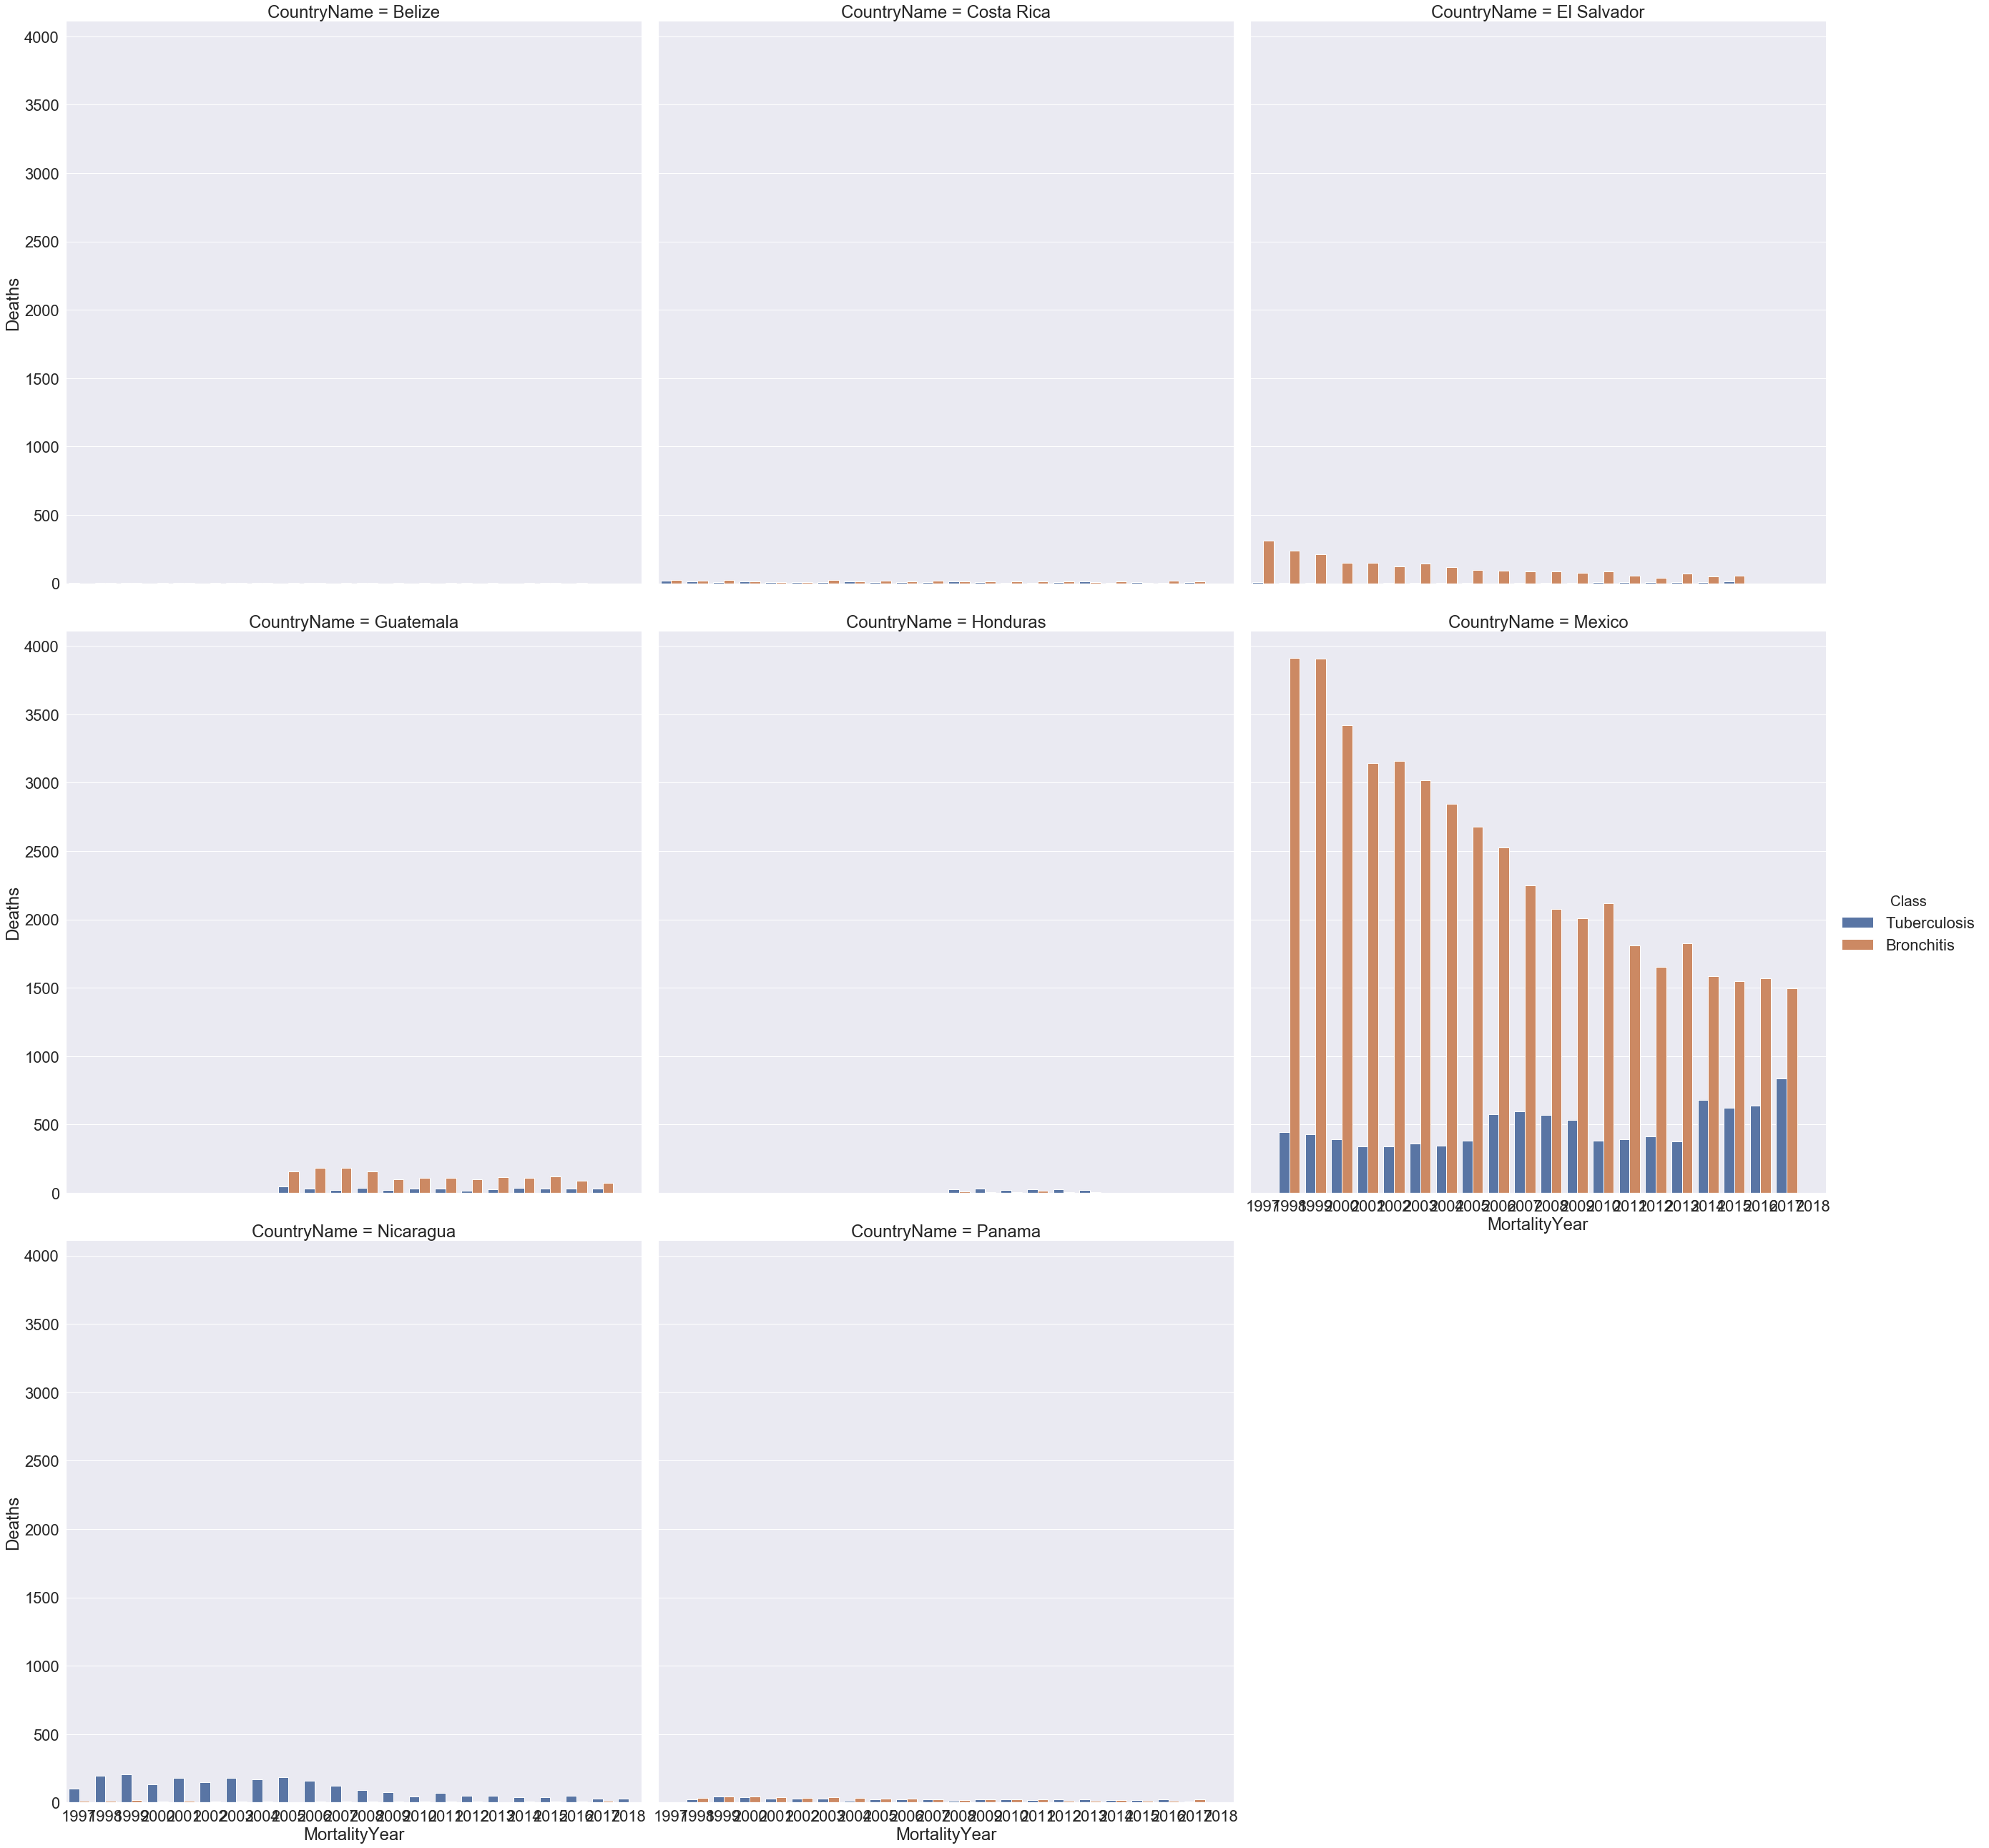

In [25]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="Class", col="CountryName",
            data=df_CentralAmerica_noICD, kind="bar",
            height=12, col_wrap=3)

As you can see, looking at the ICD10 codes seperately, we tend to lose a lot of data points. However, if we were to look at this without the ICD10 codes, we tend to get a lot more information that can be used for prediction algorithms. Inspite of this, there are some countries that do not have any data at all. We will filter out only those countries of interest.

Countries we will predict -

1. Mexico

#### For Caribbean

In [26]:
df_Caribbean = df[df['Zone'] == "Caribbean"]
df_Caribbean.head()

,CountryName,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths,Class,Zone
115,Cuba,2017,Male,28,J40,1,Bronchitis,Caribbean
116,Cuba,2017,Male,18,J42,1,Bronchitis,Caribbean
117,Cuba,2017,Male,24,J42,1,Bronchitis,Caribbean
118,Cuba,2017,Male,23,J40,1,Bronchitis,Caribbean
119,Cuba,2017,Male,19,J42,1,Bronchitis,Caribbean


##### Bronchitis for Caribbean

In [27]:
df_Caribbean_Bronchitis = df_Caribbean[df_Caribbean['Class']=="Bronchitis"]
df_Caribbean_Bronchitis.drop(['Gender', 'AgeGroupCode'], axis=1, inplace=True)
df_Caribbean_Bronchitis = df_Caribbean_Bronchitis.groupby(['CountryName', 'MortalityYear', 
                                                                 'ICD10', 'Class', 'Zone']) \
                                                                ['Deaths'].sum().reset_index()

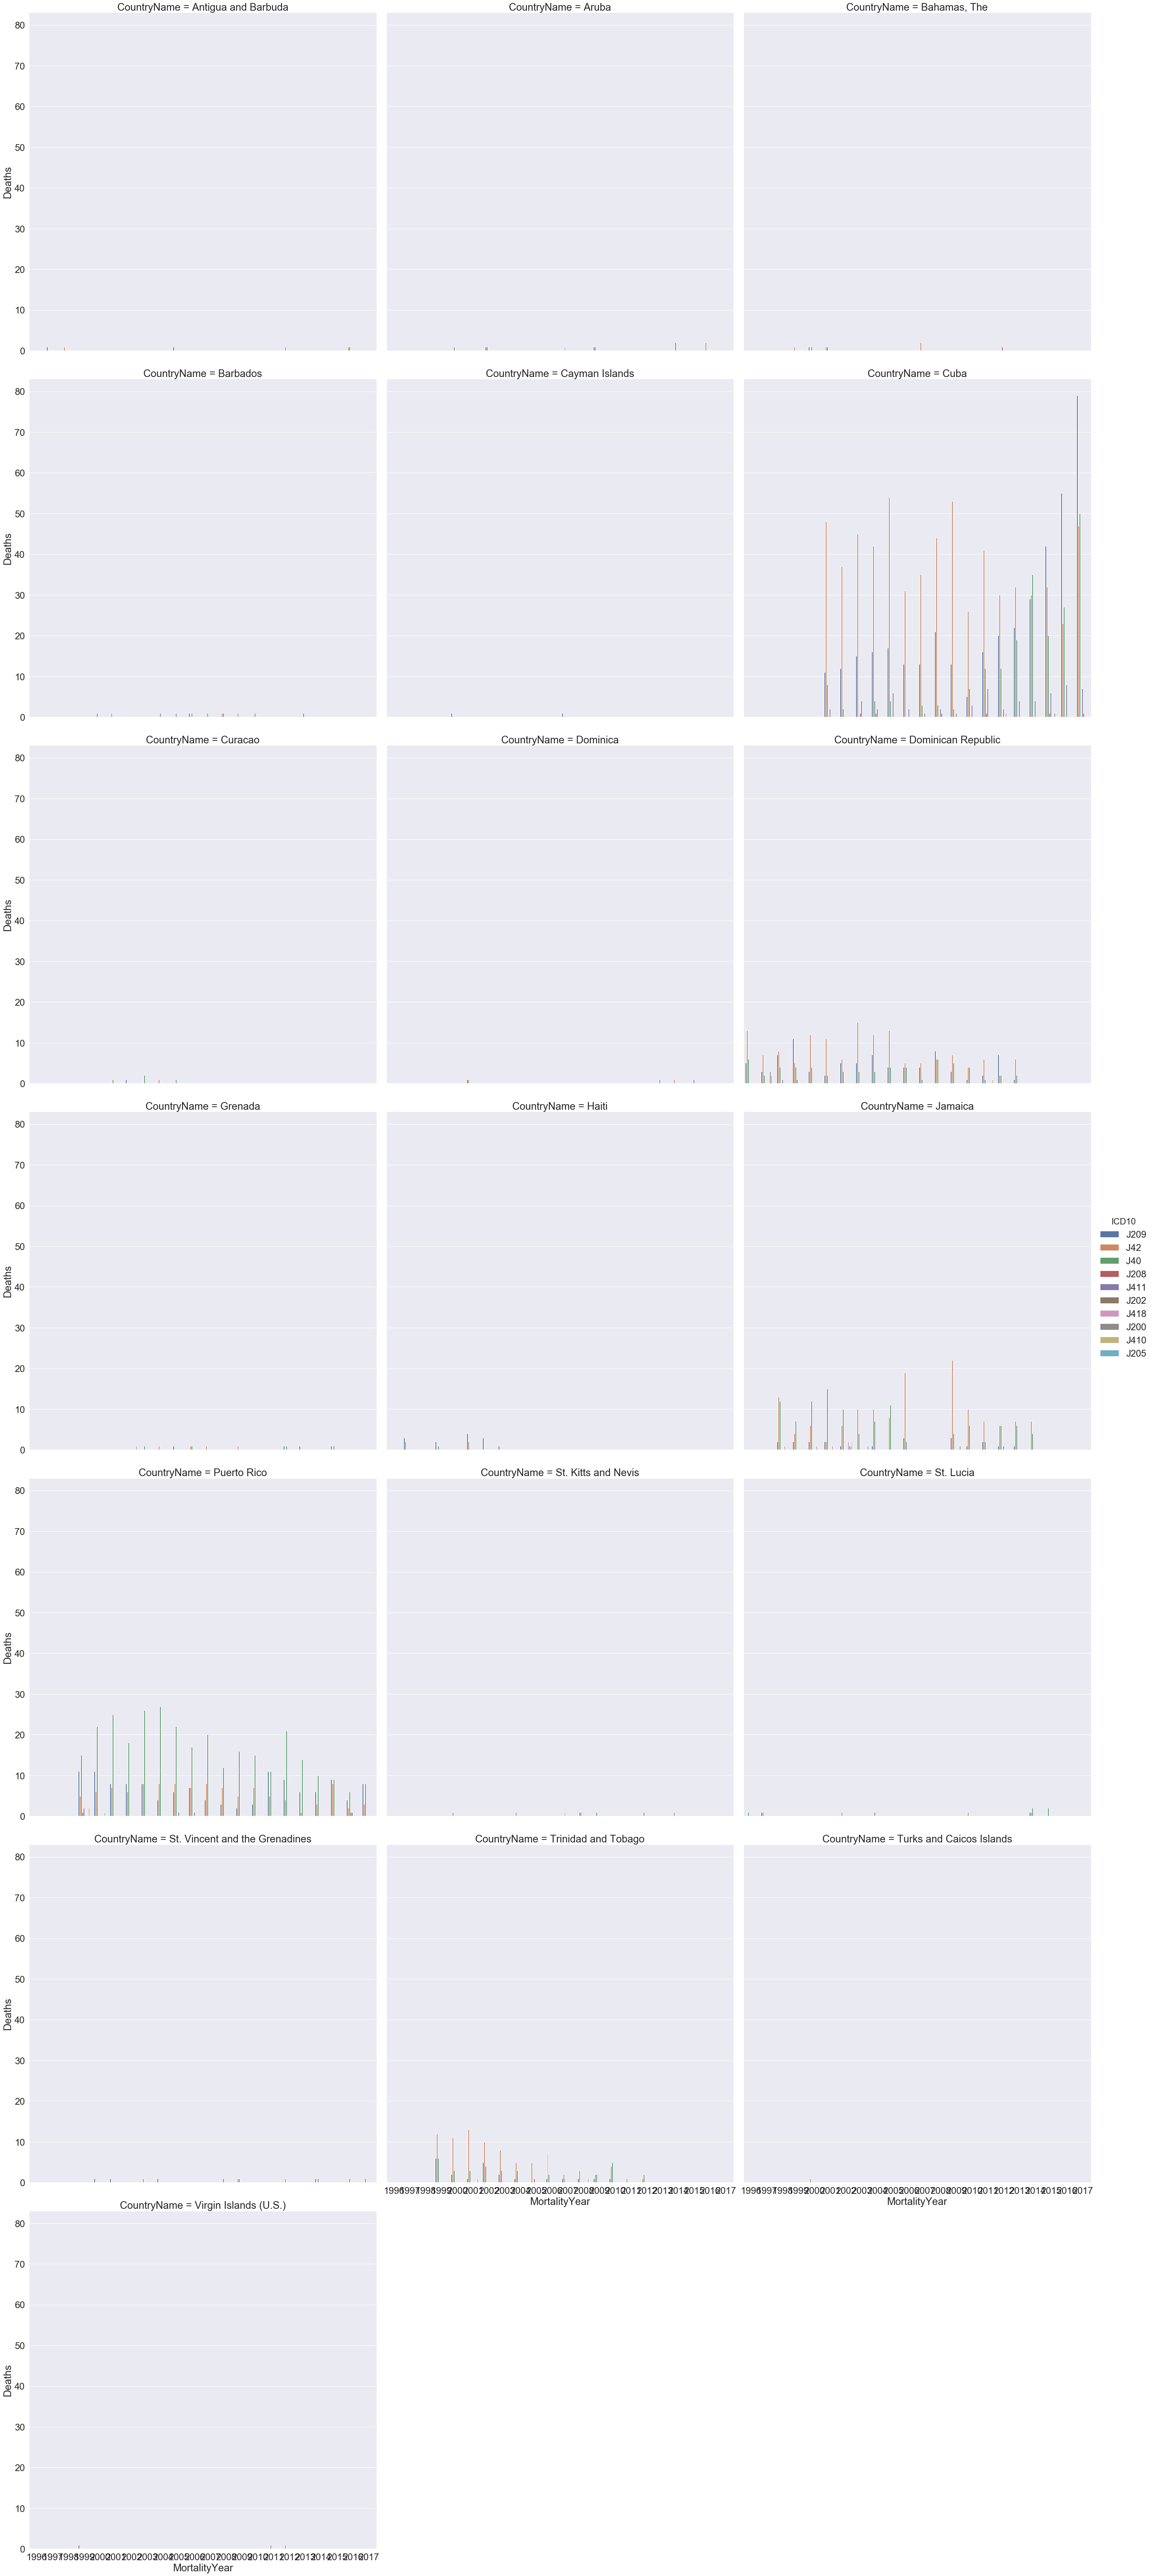

In [28]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="ICD10", col="CountryName",
            data=df_Caribbean_Bronchitis, kind="bar",
            height=12, col_wrap=3)

##### Tuberculosis for Caribbean

In [29]:
df_Caribbean_Tuberculosis = df_Caribbean[df_Caribbean['Class']=="Tuberculosis"]
df_Caribbean_Tuberculosis.drop(['Gender', 'AgeGroupCode'], axis=1, inplace=True)
df_Caribbean_Tuberculosis = df_Caribbean_Tuberculosis.groupby(['CountryName', 'MortalityYear', 
                                                                 'ICD10', 'Class', 'Zone']) \
                                                                ['Deaths'].sum().reset_index()

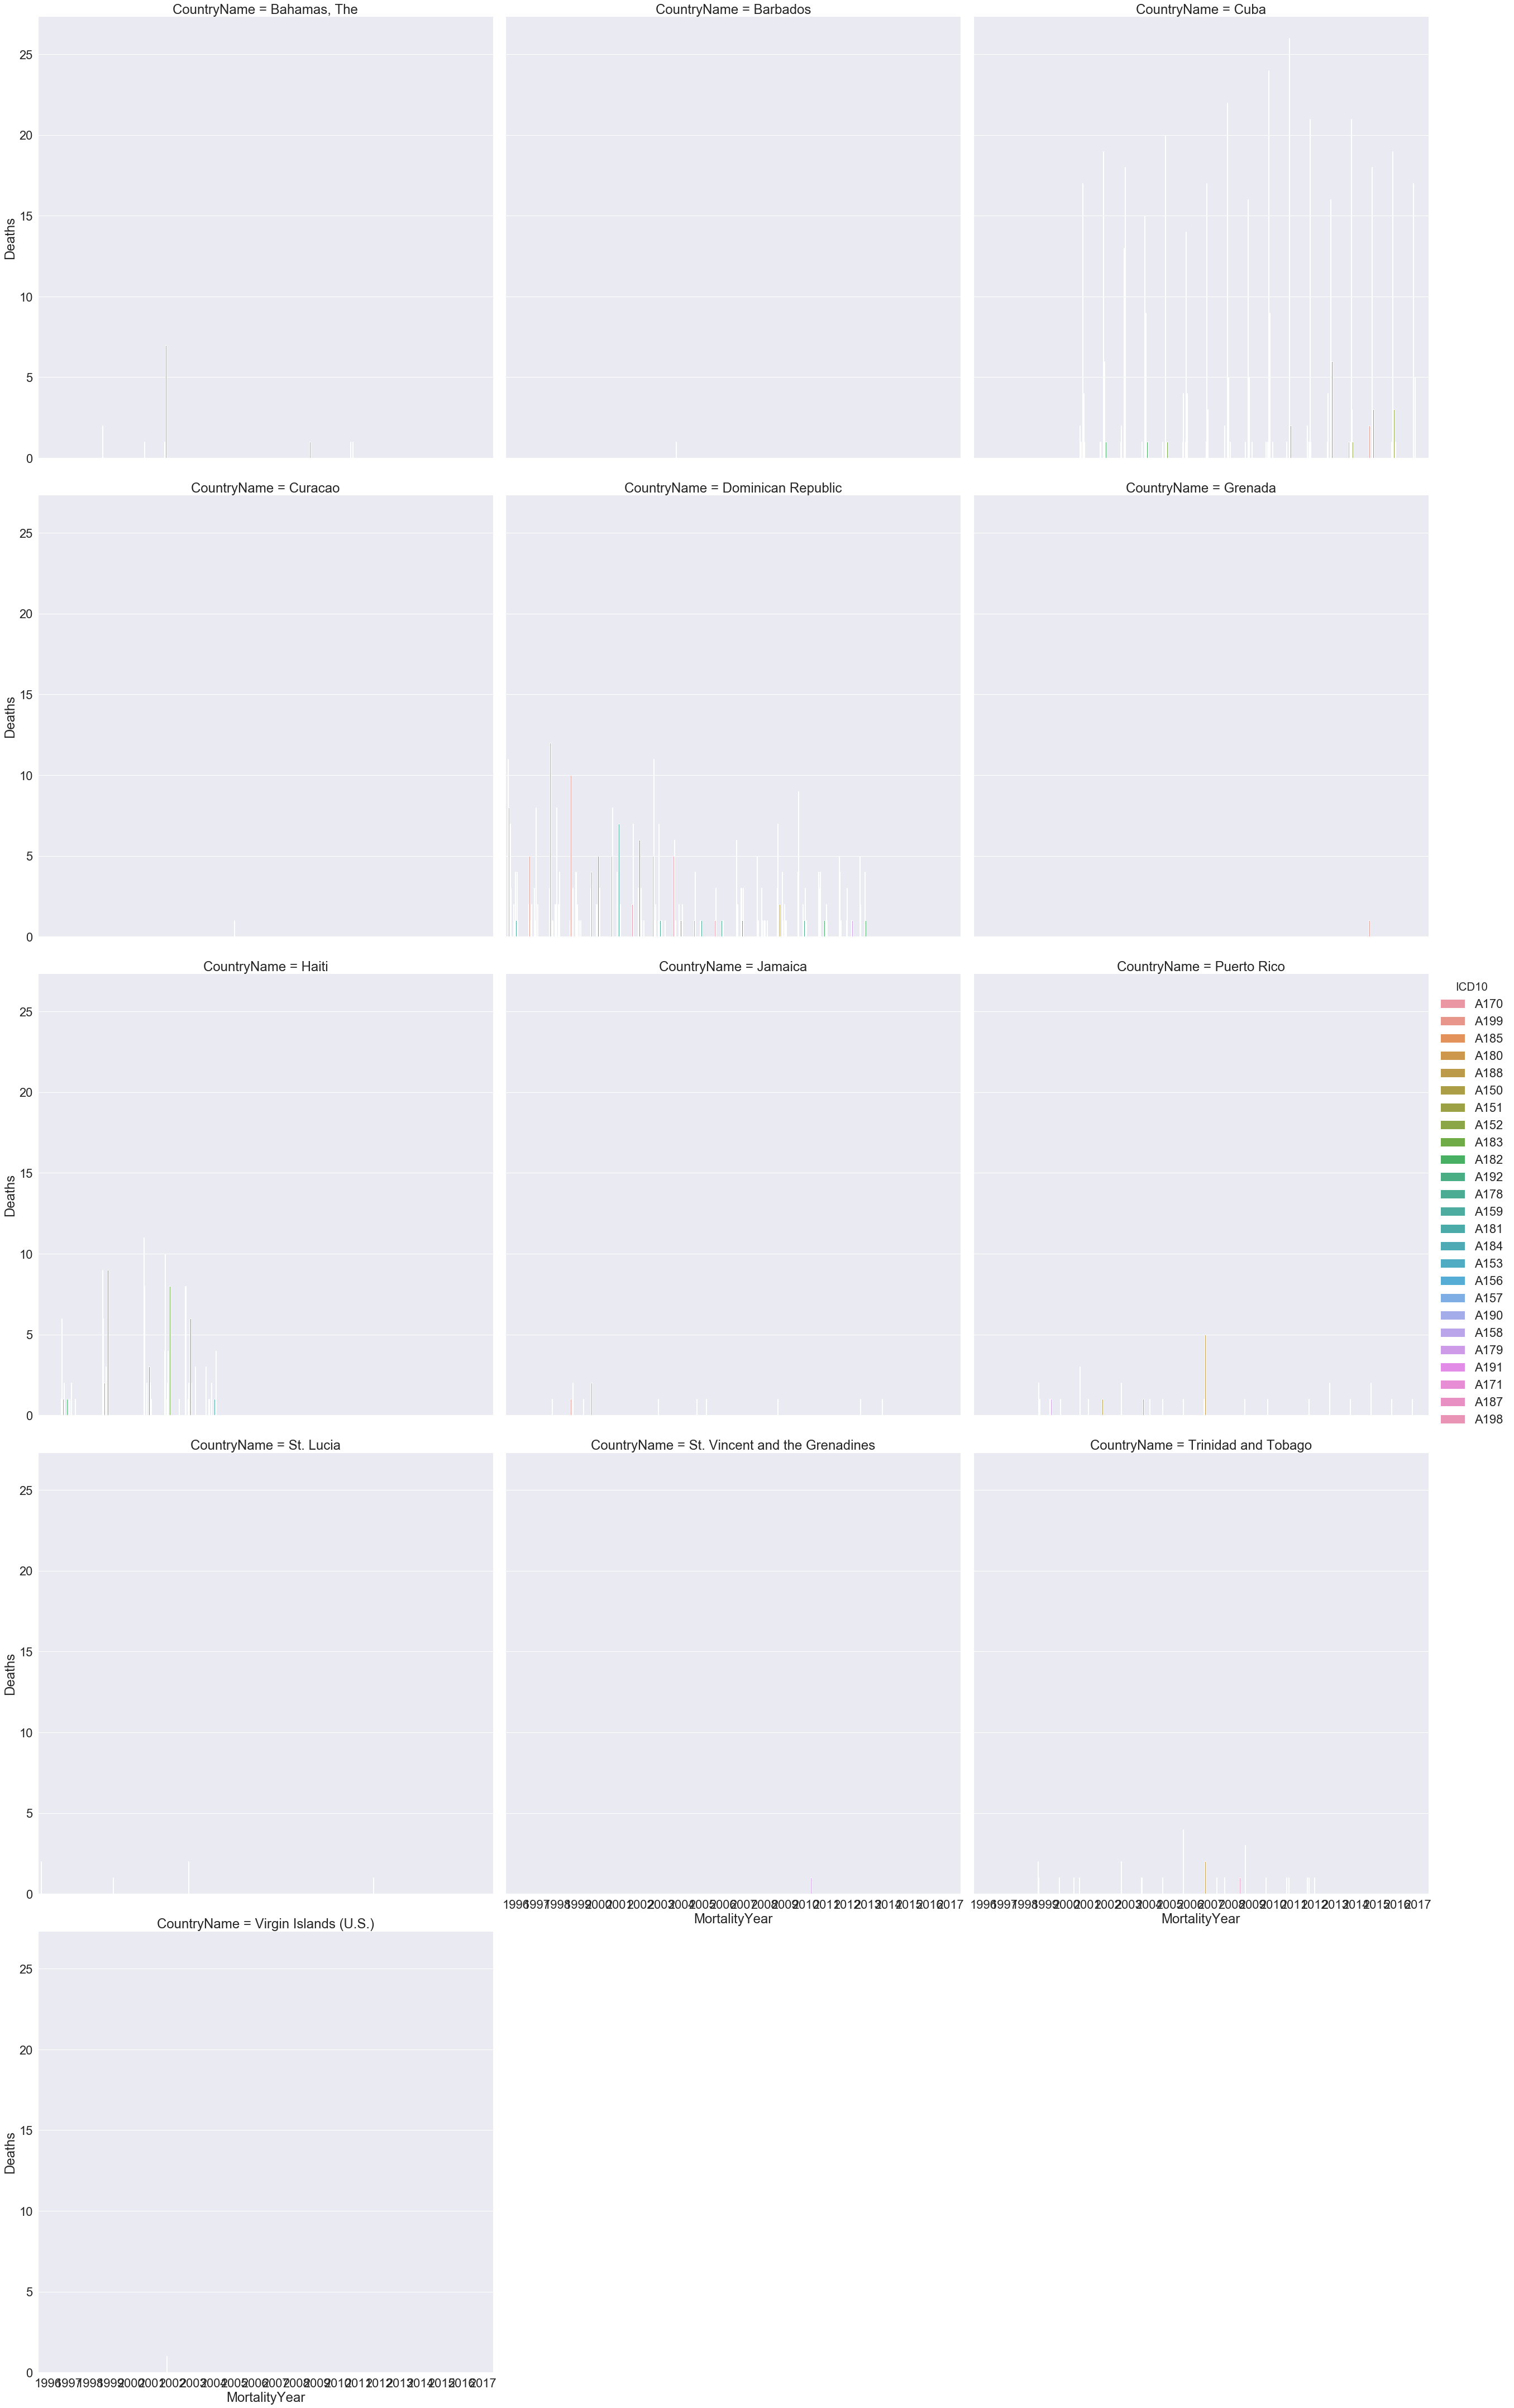

In [30]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="ICD10", col="CountryName",
            data=df_Caribbean_Tuberculosis, kind="bar",
            height=12, col_wrap=3)

##### No ICD10 for Caribbean

In [31]:
df_Caribbean_temp = df_Caribbean.copy()
df_Caribbean_temp.drop(['Gender', 'AgeGroupCode', 'ICD10'], axis=1, inplace=True)
df_Caribbean_noICD = df_Caribbean.groupby(['CountryName', 'MortalityYear', 
                                                      'Class', 'Zone'])['Deaths'].sum().reset_index()

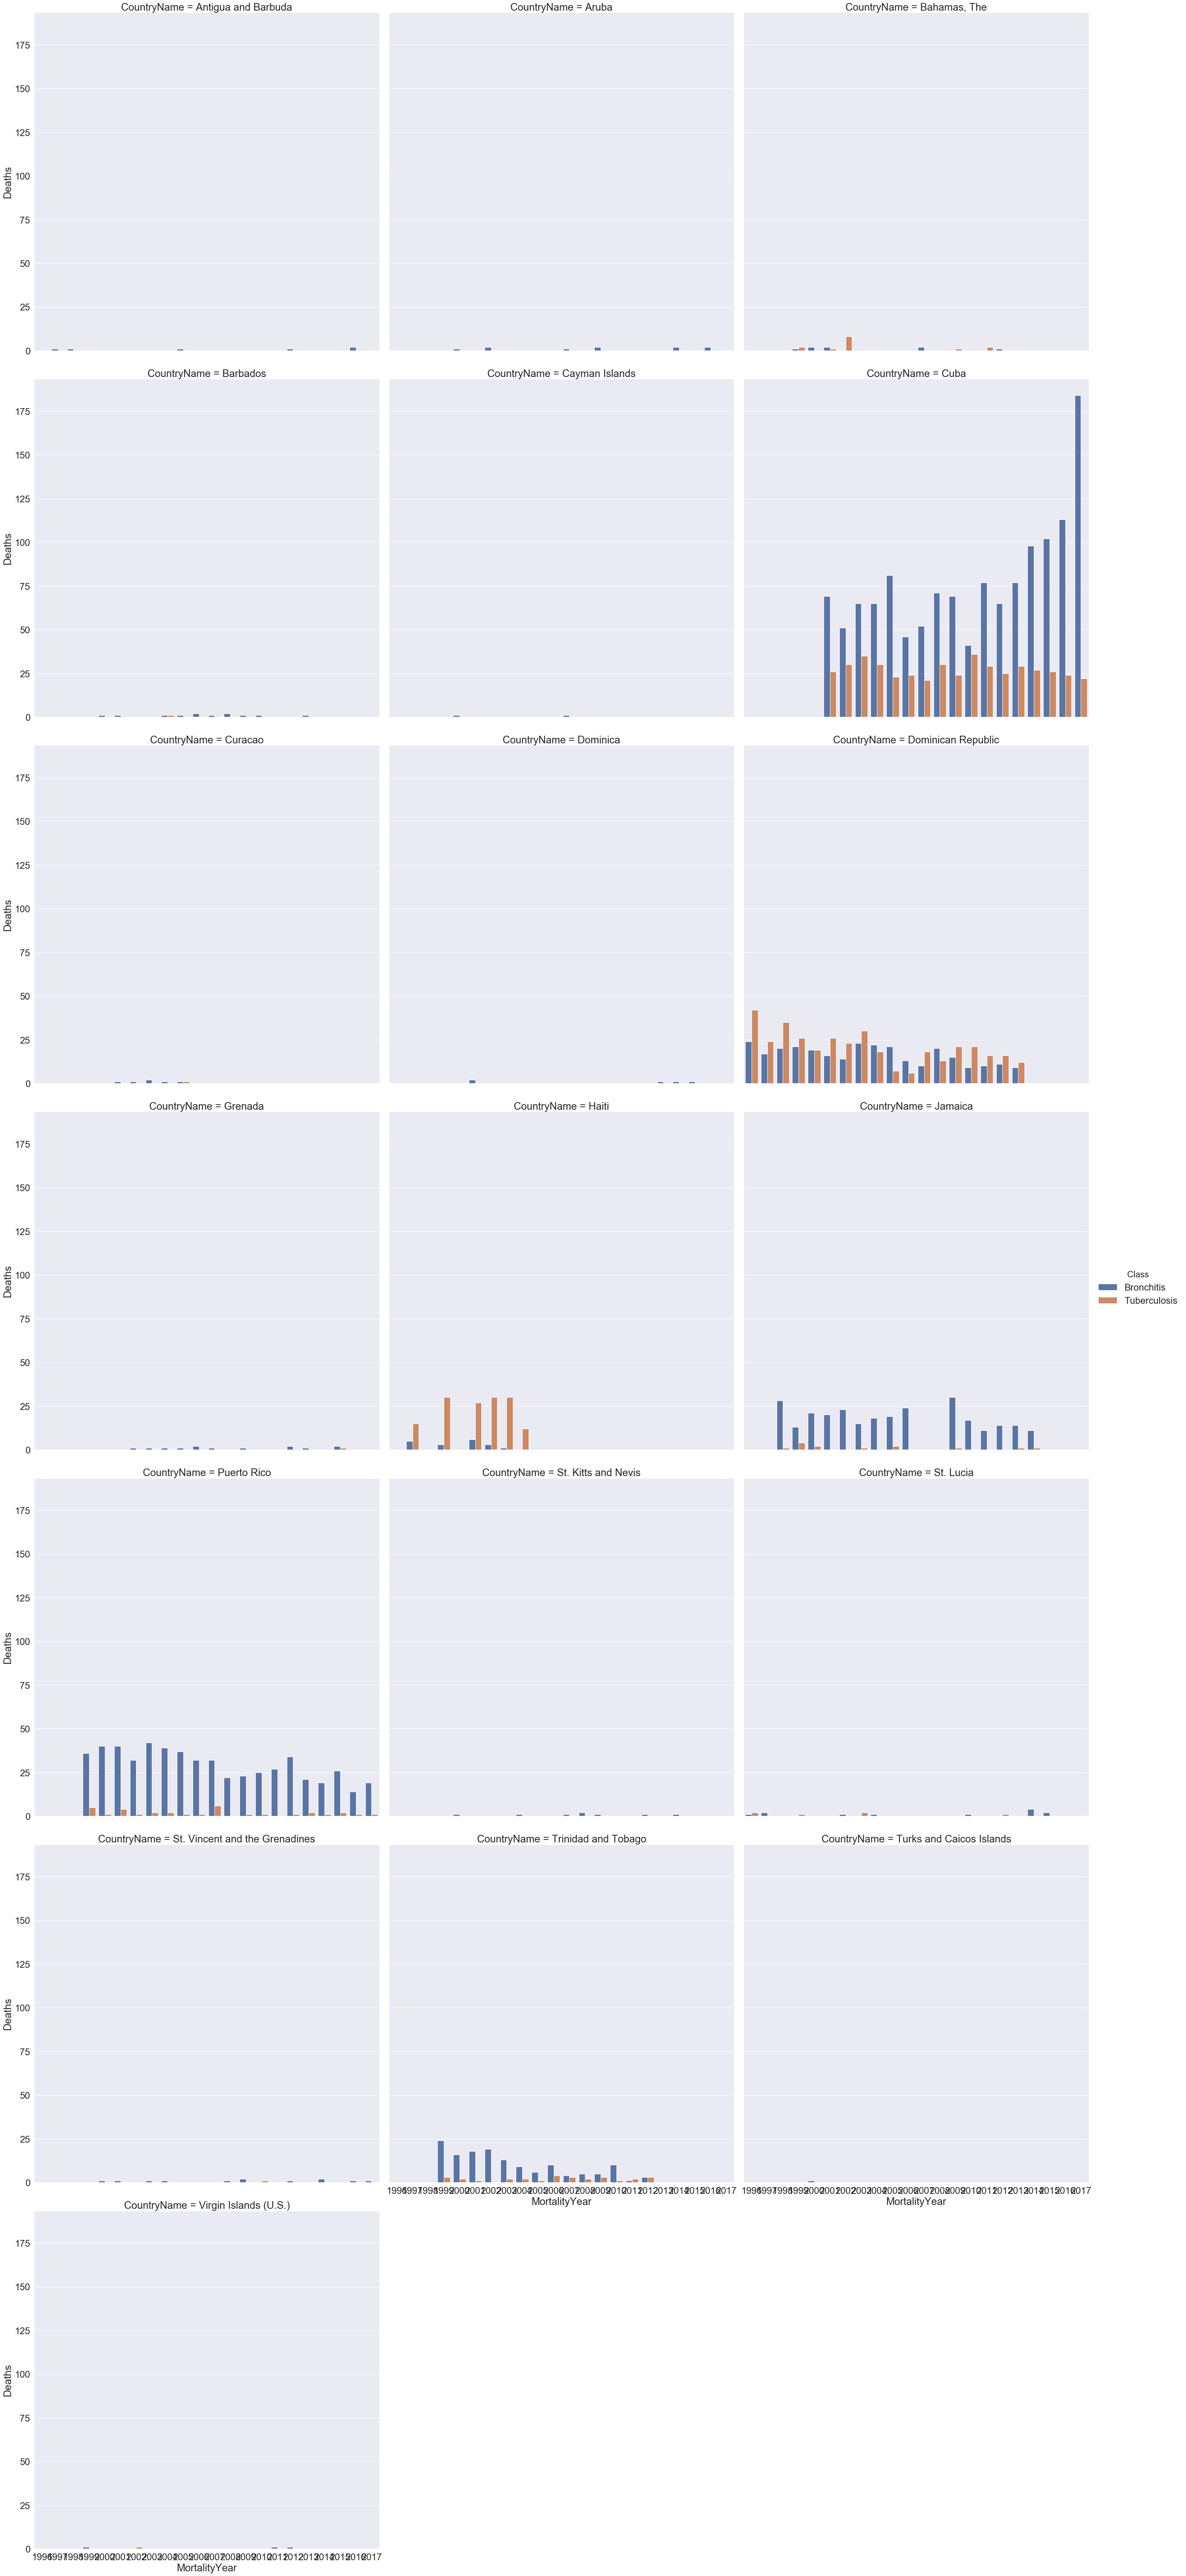

In [32]:
sns.catplot(x="MortalityYear", y="Deaths",
            hue="Class", col="CountryName",
            data=df_Caribbean_noICD, kind="bar",
            height=12, col_wrap=3)

As you can see, looking at the ICD10 codes seperately, we tend to lose a lot of data points. However, if we were to look at this without the ICD10 codes, we tend to get a lot more information that can be used for prediction algorithms. Inspite of this, there are some countries that do not have any data at all. We will filter out only those countries of interest.

Countries we will predict -

1. Cuba
2. Puerto Rico

### Conclusions of Time Series Validity -

The above analysis finalizes the following countries are those that we can use to predict the numbers based on past data and predict for future -

1. Brazil
2. Colombia
3. Argentina
4. Ecuador
5. Peru
6. Canada
7. United States
8. Mexico
9. Cuba 
10. Puerto Rico

<hr style="height:1px;border:none;color:#333;background-color:#333;">

### Time Series using ARIMA

In [22]:
from pmdarima import auto_arima
from datetime import timedelta

In [23]:
countries = ["Brazil", "Colombia", "Argentina", "Ecuador", "Peru", "Canada", "United States", 
             "Mexico", "Cuba", "Puerto Rico"]
df_ts = df[df['CountryName'].isin(countries)].drop(['Gender', 'AgeGroupCode', 'ICD10'], axis=1)
df_ts = df_ts.groupby(['CountryName', 'MortalityYear', 'Class', 'Zone'])['Deaths'].sum().reset_index()
df_ts.head()

,CountryName,MortalityYear,Class,Zone,Deaths
0,Argentina,1997,Bronchitis,SouthAmerica,282
1,Argentina,1997,Tuberculosis,SouthAmerica,144
2,Argentina,1998,Bronchitis,SouthAmerica,282
3,Argentina,1998,Tuberculosis,SouthAmerica,127
4,Argentina,1999,Bronchitis,SouthAmerica,314


In [24]:
df_ts['CountryName'].unique()

array(['Argentina', 'Brazil', 'Canada', 'Colombia', 'Cuba', 'Ecuador',
       'Mexico', 'Peru', 'Puerto Rico', 'United States'], dtype=object)

### Timeseries for all the countries

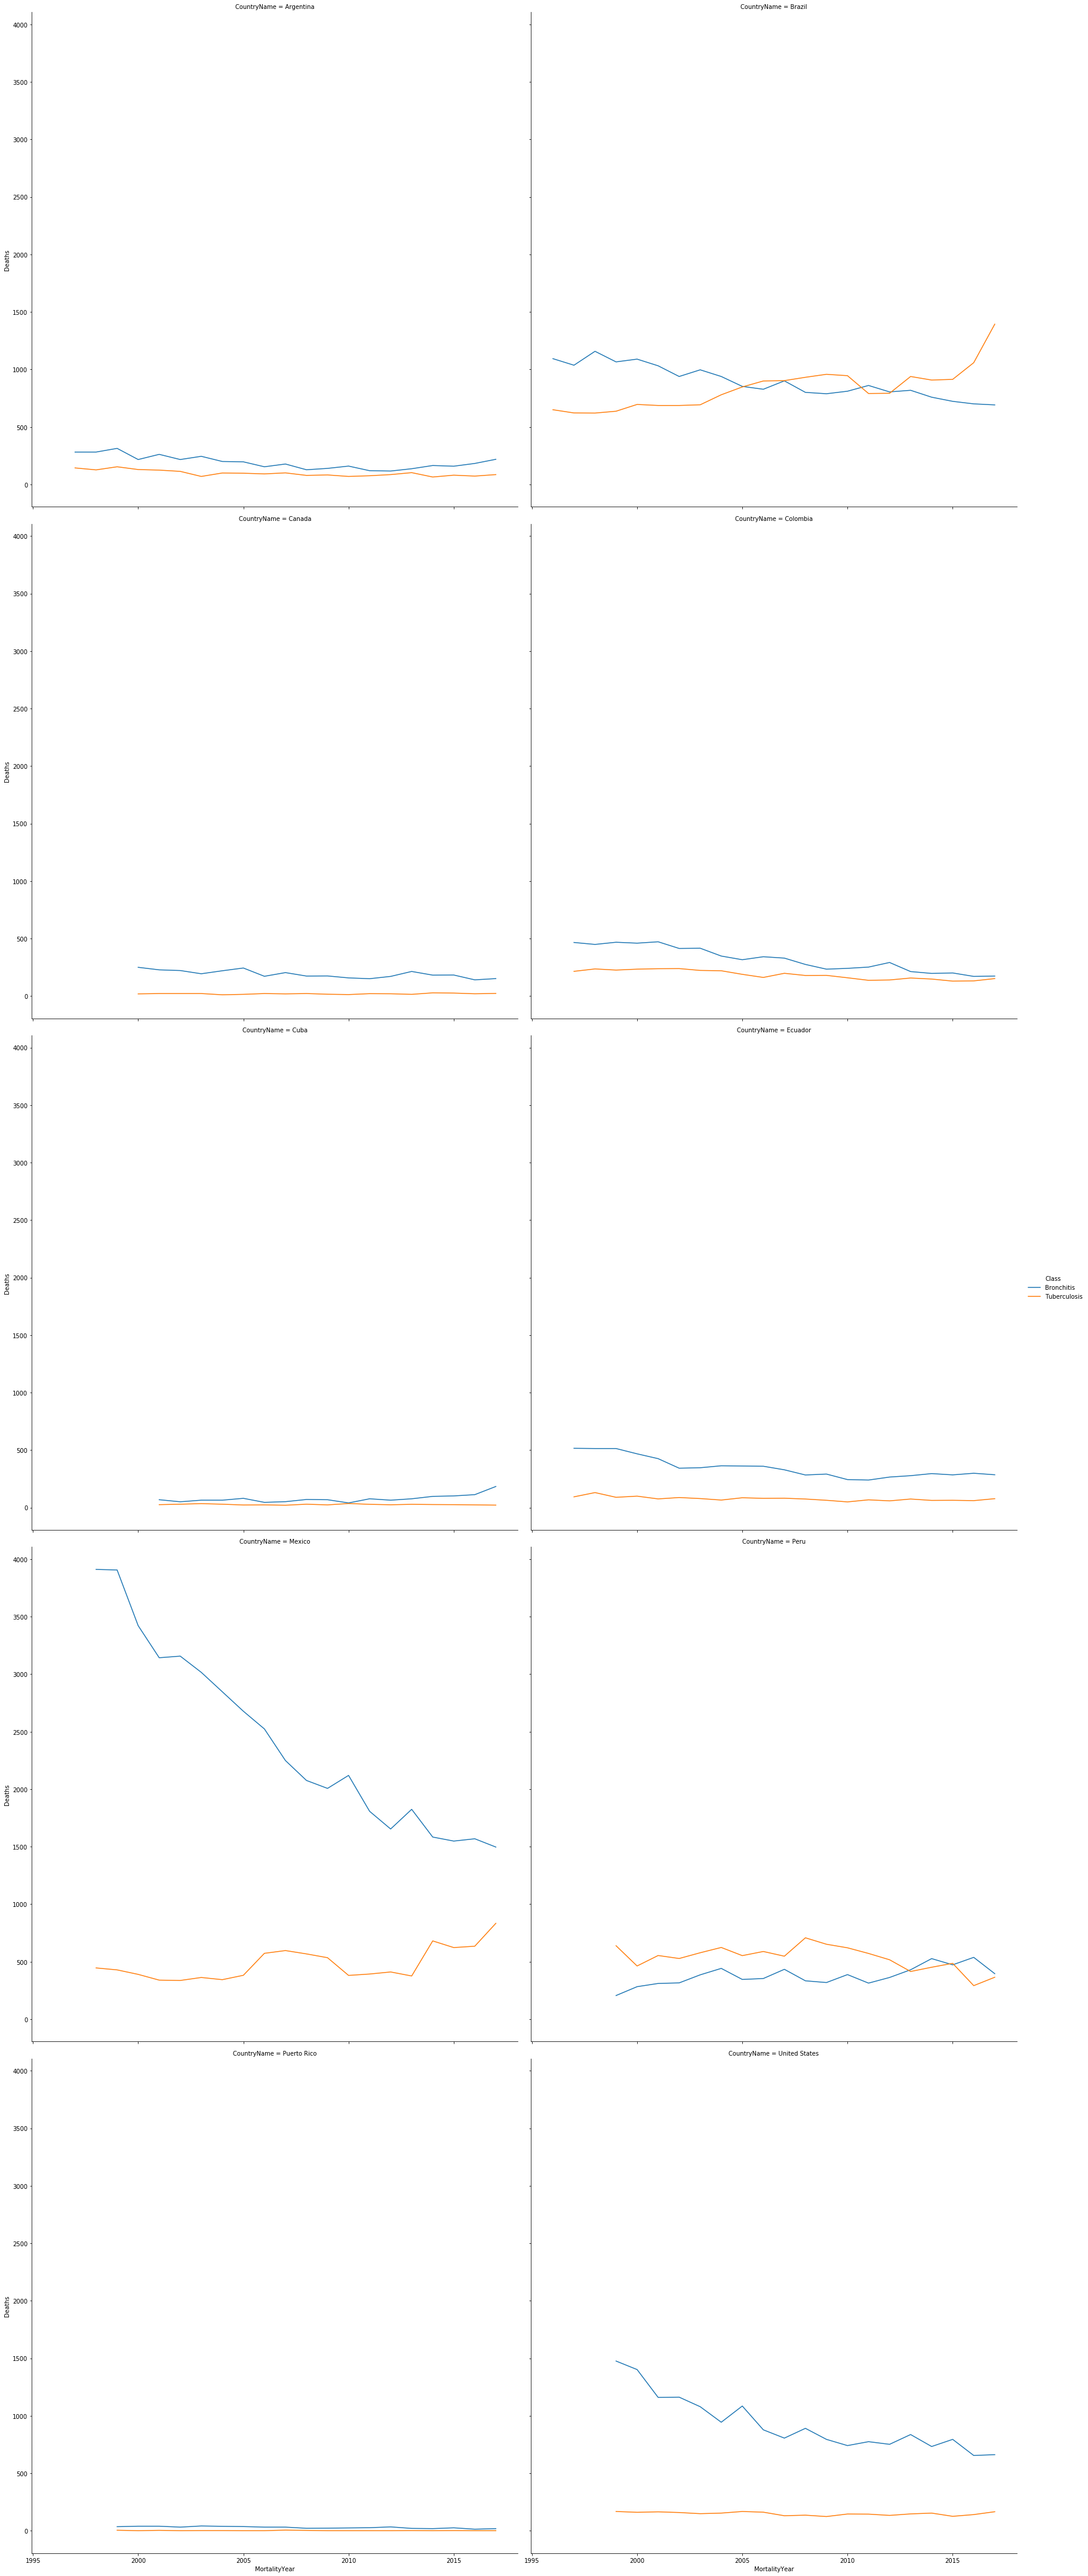

In [25]:
sns.relplot(x="MortalityYear", y="Deaths", hue="Class", col="CountryName", 
              height=12, col_wrap=2, data=df_ts,
              kind="line", legend="full")

### Let's now try this for just one country

In [26]:
df_test = df_ts[(df_ts['CountryName']=='Brazil')]


In [27]:
df_temp = df_test[['MortalityYear', 'Deaths', 'Class']].copy()
df_temp['MortalityYear'] = pd.to_datetime(df_temp['MortalityYear'], format='%Y')
df_temp.head()

,MortalityYear,Deaths,Class
42,1996-01-01,1094,Bronchitis
43,1996-01-01,650,Tuberculosis
44,1997-01-01,1037,Bronchitis
45,1997-01-01,622,Tuberculosis
46,1998-01-01,1158,Bronchitis


#### Prediction for Brazil for Bronchitis

In [28]:
df_brazil_bronchitis = df_temp[df_temp['Class']=="Bronchitis"].drop('Class', axis=1).set_index('MortalityYear')
df_brazil_bronchitis.head()

,Deaths
MortalityYear,
1996-01-01,1094
1997-01-01,1037
1998-01-01,1158
1999-01-01,1066
2000-01-01,1090


In [29]:
stepwise_model = auto_arima(df_brazil_bronchitis, start_p=1, start_q=1,
                           max_p=4, max_q=4, test='kpss', seasonal=False, trace=True,
                           error_action='ignore', suppress_warnings=True, stepwise=True)

Fit ARIMA: order=(1, 1, 1); AIC=230.674, BIC=234.852, Fit time=0.146 seconds
Fit ARIMA: order=(0, 1, 0); AIC=234.894, BIC=236.983, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=232.232, BIC=235.366, Fit time=0.025 seconds
Fit ARIMA: order=(0, 1, 1); AIC=229.819, BIC=232.952, Fit time=0.023 seconds
Fit ARIMA: order=(0, 1, 2); AIC=230.874, BIC=235.052, Fit time=0.033 seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.258 seconds


In [30]:
prediction = stepwise_model.predict(n_periods=3)
times_1 = df_brazil_bronchitis.index[-1] + timedelta(days=365)
times_2 = df_brazil_bronchitis.index[-1] + timedelta(days=730)
times_3 = df_brazil_bronchitis.index[-1] + timedelta(days=1095)

preds = pd.DataFrame(prediction, index=[times_1, times_2, times_3], columns=['Deaths'])
preds.index.name='MortalityYear'

In [31]:
last_row = df_brazil_bronchitis.iloc[-1]
preds = preds.append(last_row)

preds['color']='Red'
df_brazil_bronchitis['color'] = 'Green'

df_display = pd.concat([df_brazil_bronchitis, preds])

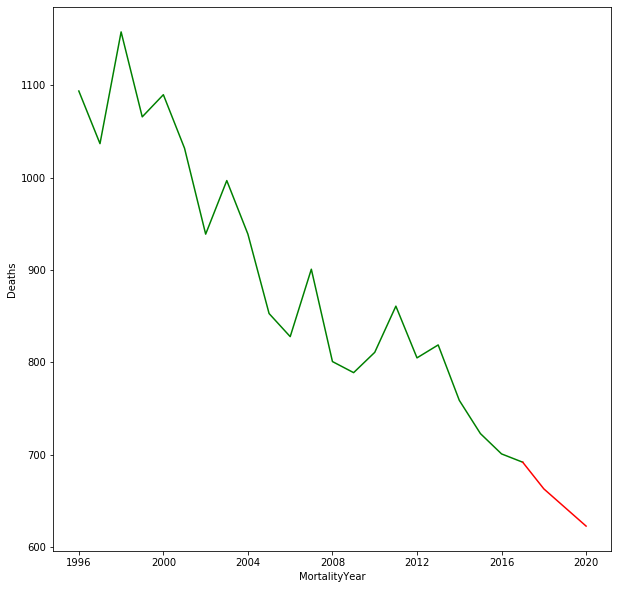

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
for k, g in df_display.groupby('color'):
    g.reset_index(inplace=True)
    ax = sns.lineplot(x='MortalityYear', y='Deaths', color=k, data=g)

#### Prediction for Brazil for Tuberculosis

In [33]:
df_brazil_tuberculosis = df_temp[df_temp['Class']=="Tuberculosis"].drop('Class', axis=1).set_index('MortalityYear')
df_brazil_tuberculosis.head()

,Deaths
MortalityYear,
1996-01-01,650
1997-01-01,622
1998-01-01,621
1999-01-01,637
2000-01-01,696


In [34]:
stepwise_model = auto_arima(df_brazil_tuberculosis, start_p=1, start_q=1,
                           max_p=4, max_q=4, test='kpss', seasonal=False, trace=True,
                           error_action='ignore', suppress_warnings=True, stepwise=True)

Fit ARIMA: order=(1, 1, 1); AIC=254.471, BIC=258.649, Fit time=0.081 seconds
Fit ARIMA: order=(0, 1, 0); AIC=253.116, BIC=255.205, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=252.647, BIC=255.780, Fit time=0.044 seconds
Fit ARIMA: order=(0, 1, 1); AIC=250.727, BIC=253.861, Fit time=0.023 seconds
Fit ARIMA: order=(0, 1, 2); AIC=252.217, BIC=256.395, Fit time=0.072 seconds
Fit ARIMA: order=(1, 1, 2); AIC=253.678, BIC=258.900, Fit time=0.068 seconds
Total fit time: 0.296 seconds


In [35]:
prediction = stepwise_model.predict(n_periods=3)
times_1 = df_brazil_tuberculosis.index[-1] + timedelta(days=365)
times_2 = df_brazil_tuberculosis.index[-1] + timedelta(days=730)
times_3 = df_brazil_tuberculosis.index[-1] + timedelta(days=1095)

preds = pd.DataFrame(prediction, index=[times_1, times_2, times_3], columns=['Deaths'])
preds.index.name='MortalityYear'

In [36]:
last_row = df_brazil_tuberculosis.iloc[-1]
preds = preds.append(last_row)

preds['color']='Red'
df_brazil_tuberculosis['color'] = 'Green'

df_display = pd.concat([df_brazil_tuberculosis, preds])

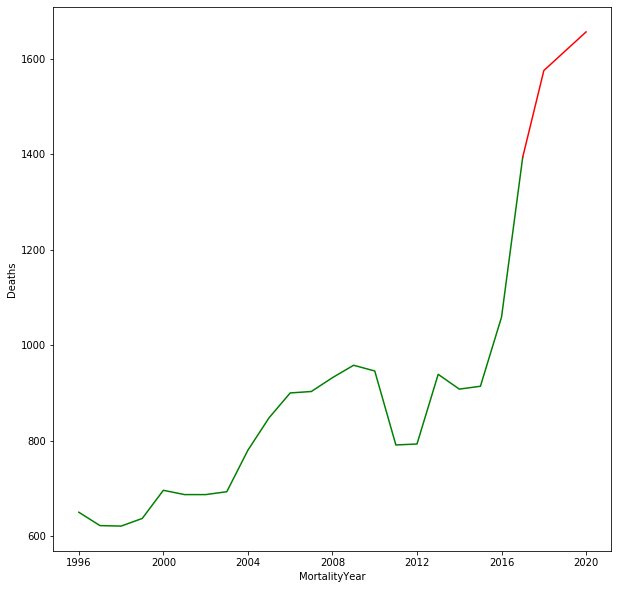

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
for k, g in df_display.groupby('color'):
    g.reset_index(inplace=True)
    ax = sns.lineplot(x='MortalityYear', y='Deaths', color=k, data=g)

With this analysis we see the viability of using time series analysis by only using the Mortatlity dataset without any ICD10 codes. From this we will begin the next phase of time series analysis of including the indicators into our prediction model as this adds an extra layer of abstraction.

In [47]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_brazil_arima.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.935736
p-value: 0.775976


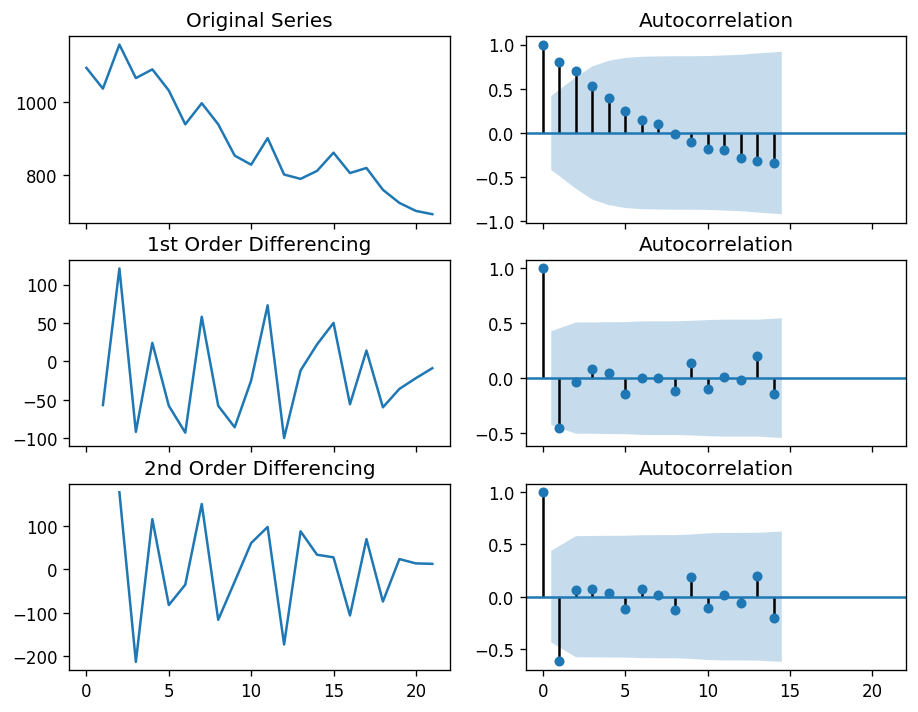

In [82]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = df_brazil_arima.reset_index()

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Deaths); axes[0, 0].set_title('Original Series')
plot_acf(df.Deaths, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Deaths.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Deaths.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Deaths.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Deaths.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

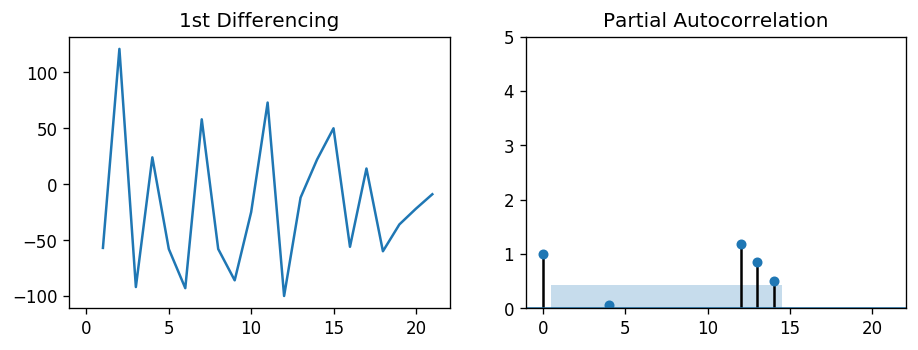

In [83]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Deaths.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Deaths.diff().dropna(), ax=axes[1])

plt.show()

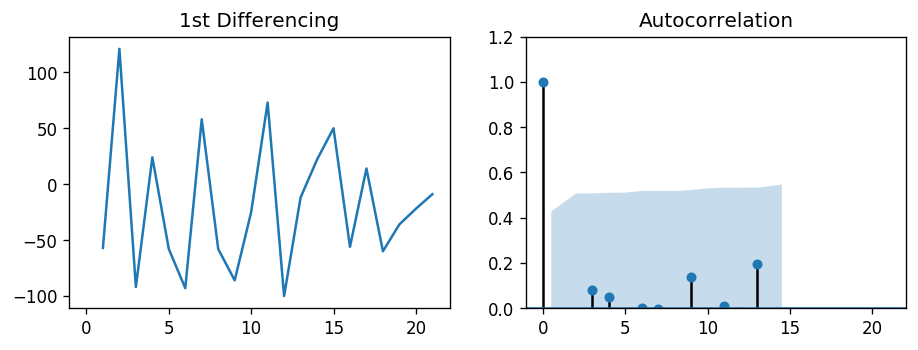

In [84]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Deaths.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Deaths.diff().dropna(), ax=axes[1])

plt.show()

In [104]:
from statsmodels.tsa.arima_model import ARIMA

df.columns = ["Time","Value"]
# 1,1,2 ARIMA Model
model = ARIMA(df.Value, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Value   No. Observations:                   20
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -109.399
Method:                       css-mle   S.D. of innovations             51.262
Date:                Wed, 29 Apr 2020   AIC                            228.797
Time:                        12:43:43   BIC                            233.776
Sample:                             2   HQIC                           229.769
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0728      1.117     -0.065      0.948      -2.263       2.117
ar.L1.D2.Value    -0.5393      0.214     -2.524      0.012      -0.958      -0.121
ar.L2.D2.Value    -0.2907      0.241

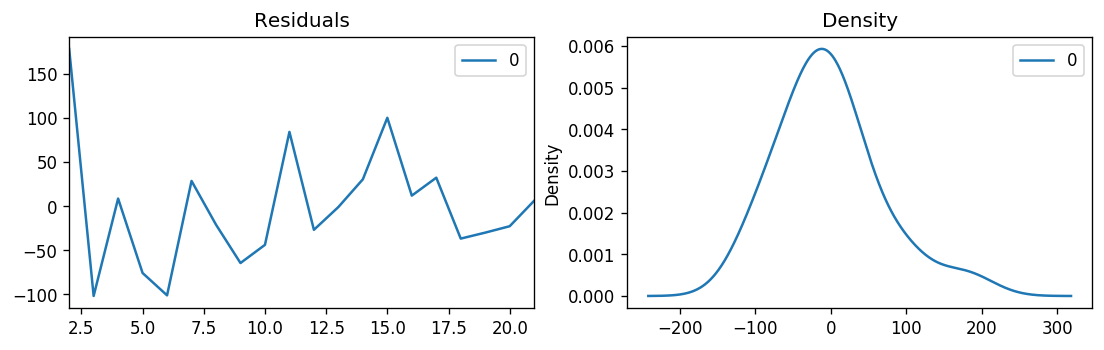

In [105]:
plt.rcParams.update({'figure.figsize':(11,3), 'figure.dpi':120})
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

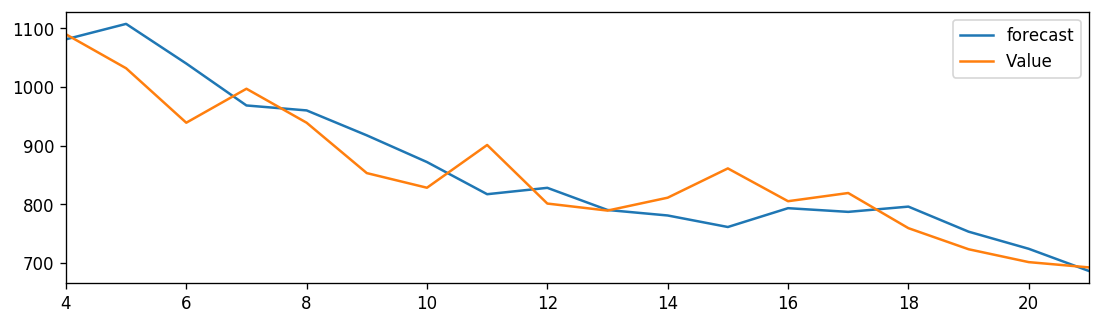

In [106]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()